# A Study on the Future Prediction of Cryptocurrency prices using Deep Learning.

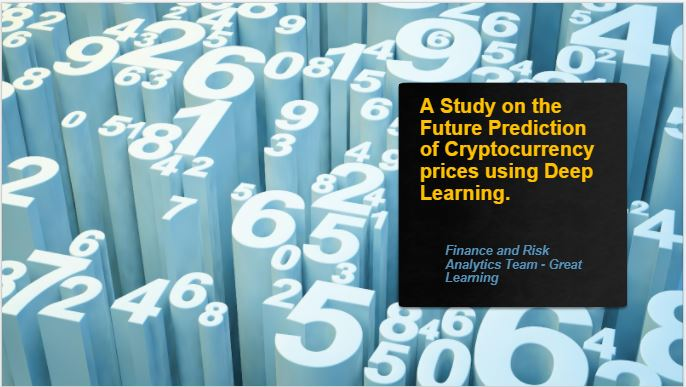

## 1.Problem statement

Predicting the future is no easy task. But many of us would want to know what will happen
next and would go to great lengths to figure that out. Imagine the possibilities of knowing what
will happen in the future! Many people may regret not buying Cryptocurrency but how are we
supposed to know in the first place? This is the dilemma we now face in regards to
Cryptocurrency. We do not want to miss out on the next jump in price but we do not know
when that will or will not happen. So, through our research we potentially identify the outcomes
from the price prediction analysis of the cryptocurrencies to match the investor’s appetite.

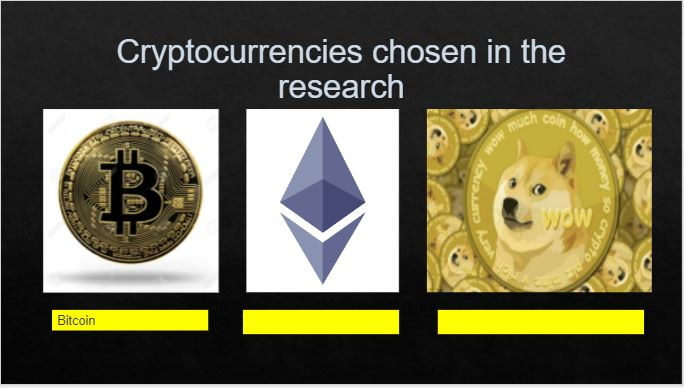

In [9]:
from google.colab import files
files.upload()

Saving metrics.xlsx to metrics.xlsx


{'metrics.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00A7\x82\xcfn\x01\x00\x00\x04\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

# 3.Import the required libraries

In [1]:
!pip install yfinance 

     |████████████████████████████████| 6.3 MB 7.8 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
#Import all the required liabraries.
import pandas as pd # Using pandas for analytics and to visualize our dataset
import numpy as np # to perform complex mathametical operation and handaling data in array we are using Numpy library
import matplotlib.pyplot as plt # For visualizing the data
import seaborn as sns # For visualizing the data
pd.options.display.float_format = '{:.6f}'.format

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout,Activation,Bidirectional
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import   seasonal_decompose

from statsmodels.graphics.tsaplots import plot_pacf , plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
plt.rcParams['figure.figsize']=[18,7] # setting default figure size

# 4.Understanding crypto currency dataset

* Open : It refers to the price at the beginning of a particular day.
* High : It refers to the highest price reached at the particular day. 
* Low : The lowest rate at that particular day.
* Close : It refers to the price at the end of the particular day.  
* Adj. Close :The adjusted closing price amends a stock's closing price to reflect that stock's value after accounting for any               corporate actions.
* Volumne :  The number of a stock’s shares that are traded on a stock exchange in a day or a period of time. Volume is                      important because it confirms trend directions.

In [ ]:
# we predicting future close price so we are considering only Close column

In [6]:
#Here we are importing data from yahoo finance
import yfinance as yf

In [7]:
from datetime import date as dt # importing date time module

In [8]:
BTC= yf.download('BTC-INR',period='6mo',interval='1h')
ETH = yf.download('ETH-INR',period='6mo',interval='1h')
Doge = yf.download('DOGE-INR',period='6mo',interval='1h')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [11]:
BTC=BTC.iloc[:-1,:]
ETH=ETH.iloc[:-1,:]
Doge=Doge.iloc[:-1,:]


In [12]:
combined_data = pd.concat([BTC['Close'],ETH['Close'],Doge['Close']],axis=1)
combined_data.columns = ['BTC-Close','ETH-Close','Doge-Close']
combined_data

,BTC-Close,ETH-Close,Doge-Close
2021-06-10 17:00:00+00:00,2668399.500000,180408.046875,23.922043
2021-06-10 18:00:00+00:00,2681024.500000,180561.109375,23.958612
2021-06-10 19:00:00+00:00,2680440.750000,179889.593750,23.948931
2021-06-10 20:00:00+00:00,2659242.750000,180170.546875,23.920578
2021-06-10 21:00:00+00:00,2674397.500000,180966.812500,23.931631
...,...,...,...
2021-12-10 13:00:00+00:00,3752640.500000,317932.281250,13.127729
2021-12-10 14:00:00+00:00,3654204.250000,304716.812500,12.706979
2021-12-10 15:00:00+00:00,3633669.500000,304055.625000,12.681739
2021-12-10 16:00:00+00:00,3607858.750000,301774.062500,12.719315


In [ ]:
# Statistical test for Stationarity of data
# Stationarity means that the statistical properties of a a time series (or rather the process generating it) do not change over time.

In [13]:
def test_stationarity(timeseries):
    
    '''#Determing rolling statistics
    rolmean = timeseries.rolling(window=100).mean()
    rolstd = timeseries.rolling(window=100).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)'''
    decomposition = seasonal_decompose(timeseries,model='multiplicative', freq=100)
    decomposition.plot();
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    test_stat,p_val = dftest[0],dftest[1]
    print(" Test Statistics :",test_stat)
    print('P_val :',p_val)
    if p_val > 0.05:
      print('There is No Stationarity with in the Data') # No Stationarity means that the statistical properties of a a time series data change over time.
    else:
      print('There is a Stationarity with in the Data') # Stationarity means that the statistical properties of a a time series  do not change over time.
    

In [14]:
combined_data.bfill(axis=0,inplace=True)

In [15]:
combined_data.isna().sum()

BTC-Close     0
ETH-Close     0
Doge-Close    0
dtype: int64

Results of Dickey-Fuller Test:
 Test Statistics : -1.35498554415363
P_val : 0.6036564226221318
There is No Stationarity with in the Data


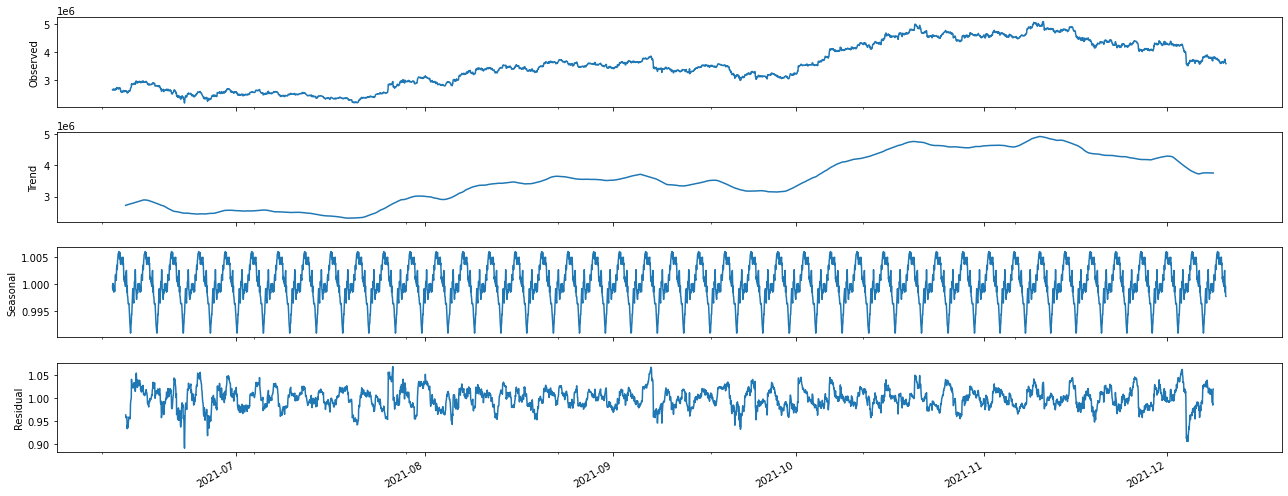

In [16]:
test_stationarity(combined_data['BTC-Close'])

Results of Dickey-Fuller Test:
 Test Statistics : -1.136963836099605
P_val : 0.7001083910105741
There is No Stationarity with in the Data


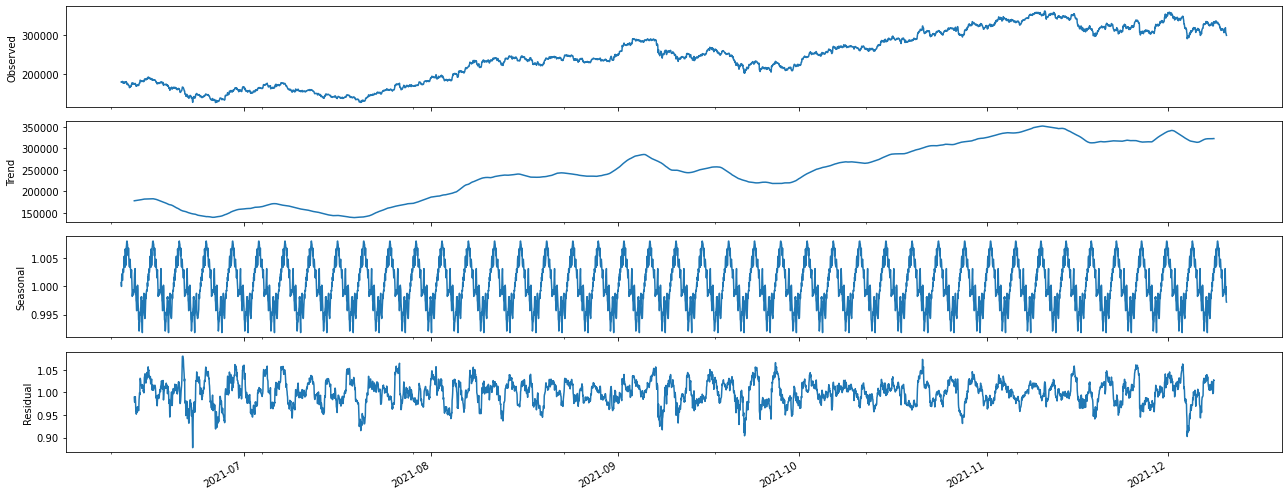

In [17]:
test_stationarity(combined_data['ETH-Close'])

Results of Dickey-Fuller Test:
 Test Statistics : -2.580674118817579
P_val : 0.09705767928522685
There is No Stationarity with in the Data


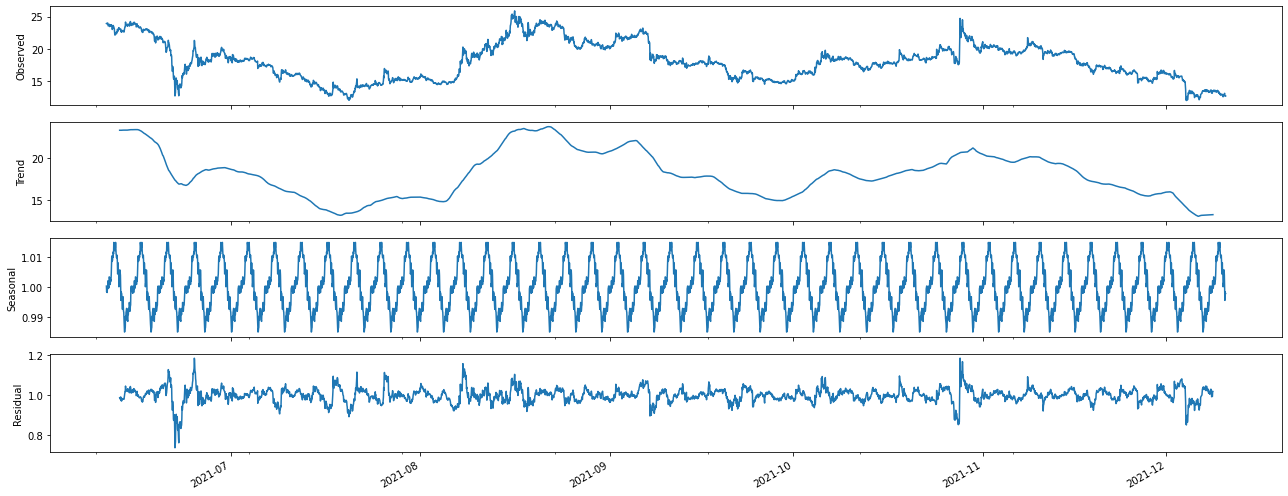

In [18]:
test_stationarity(combined_data['Doge-Close'])

In [ ]:
## Auto correlation function plot

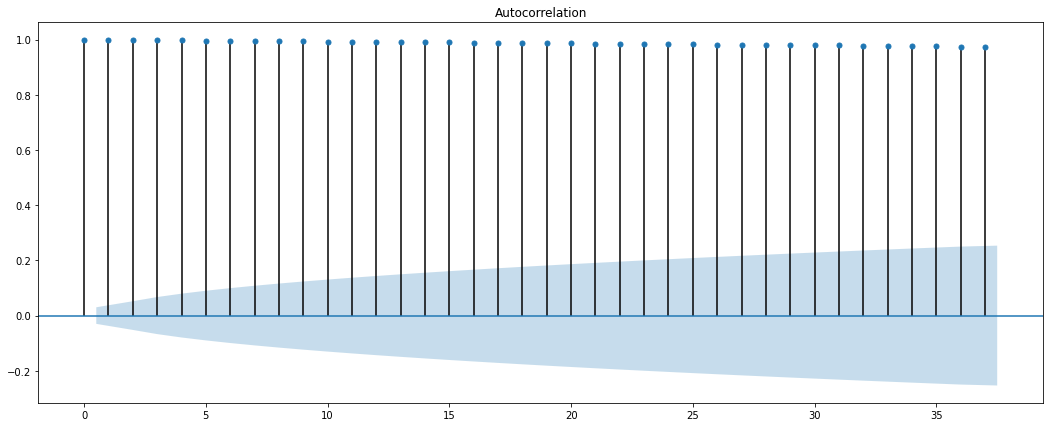

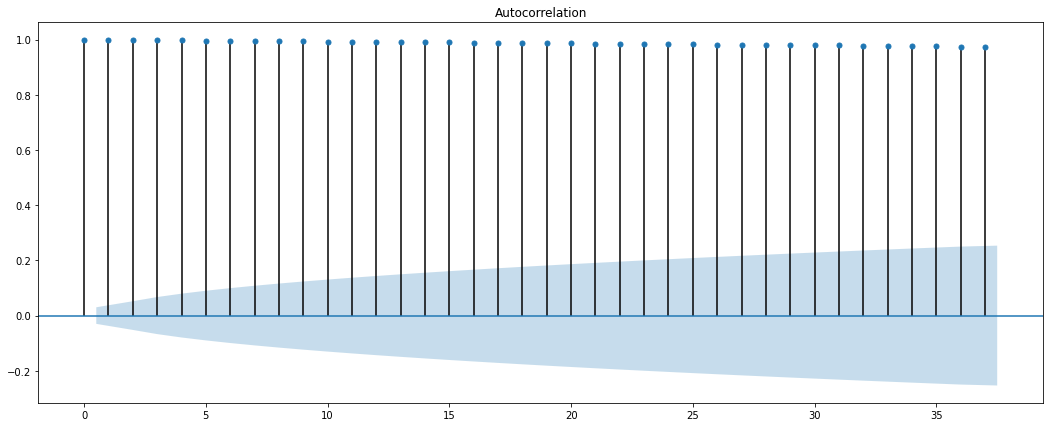

In [19]:
plot_acf(combined_data['BTC-Close'])

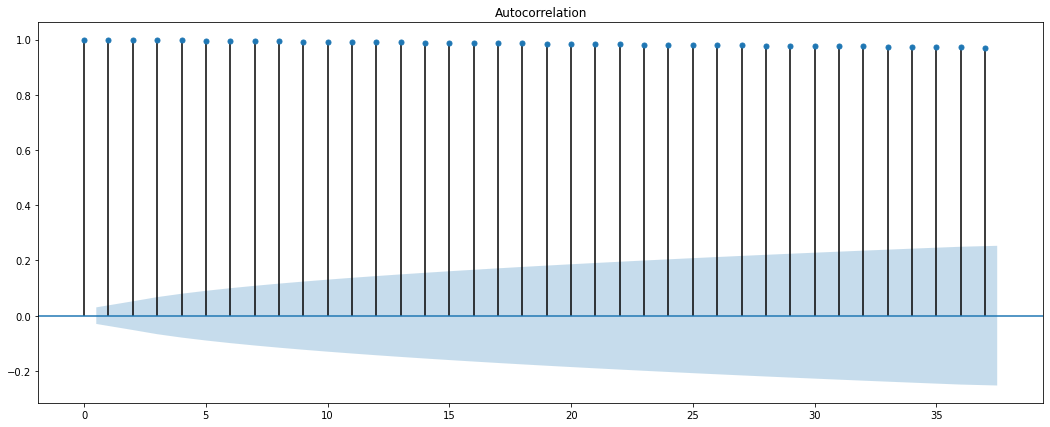

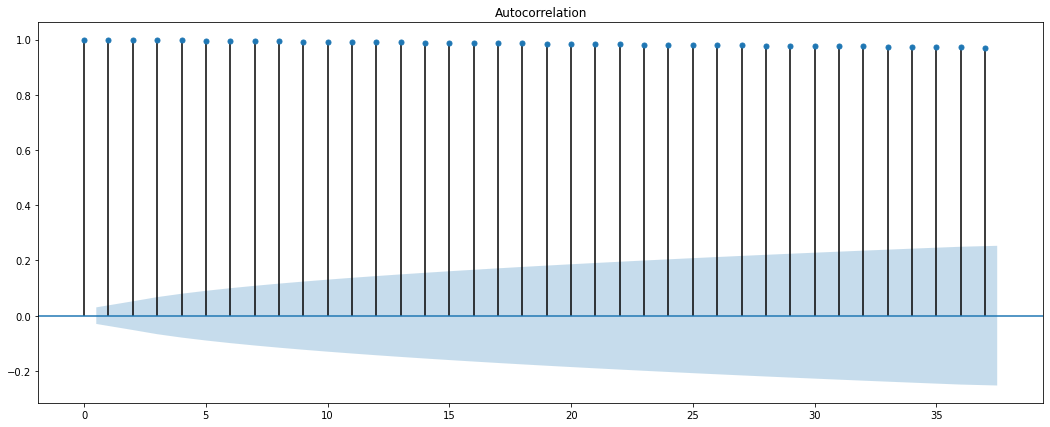

In [20]:
plot_acf(combined_data['ETH-Close'])

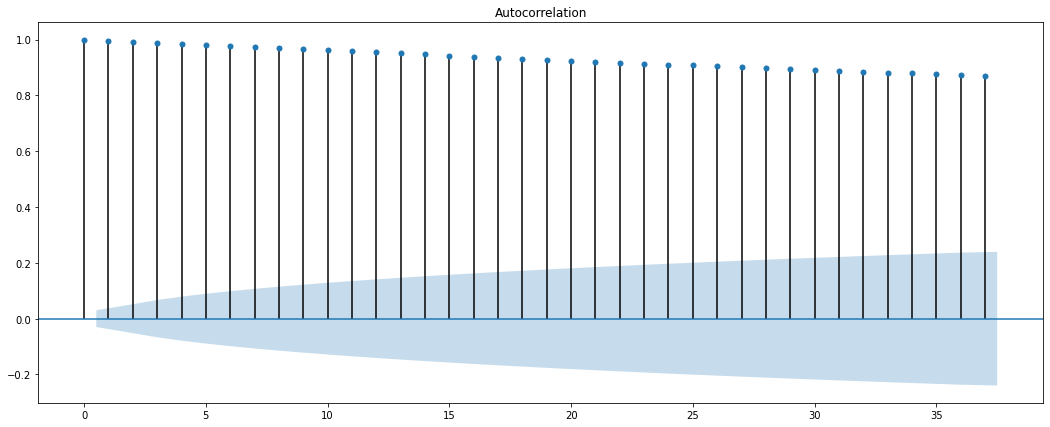

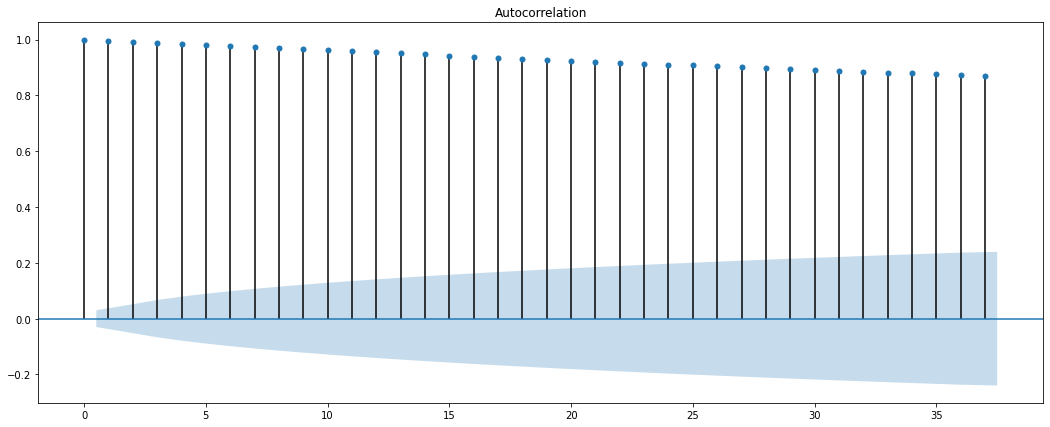

In [21]:
plot_acf(combined_data['Doge-Close'])

In [ ]:
# Pacf : partial auto corrlation function plot

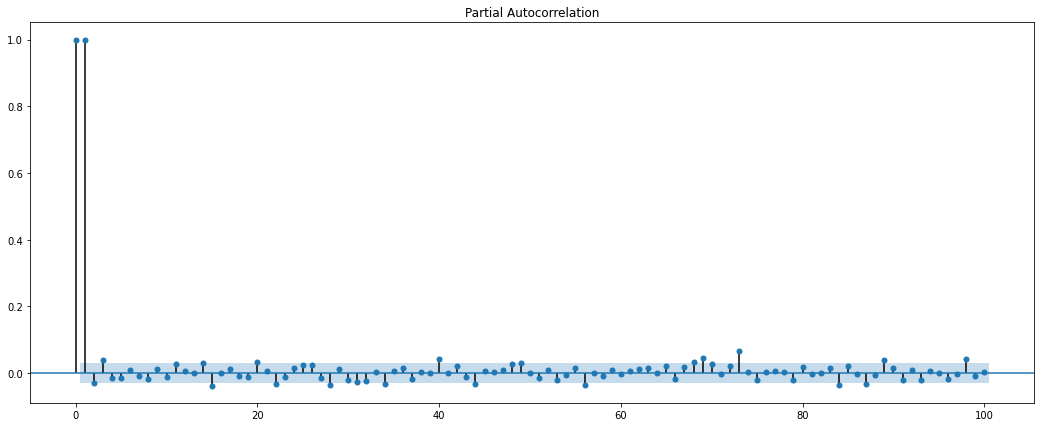

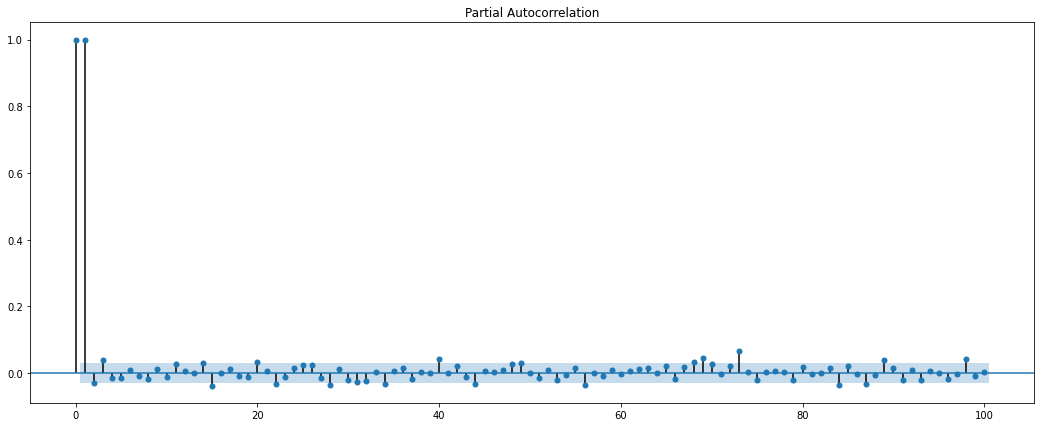

In [22]:
plot_pacf(combined_data['BTC-Close'],lags=100)

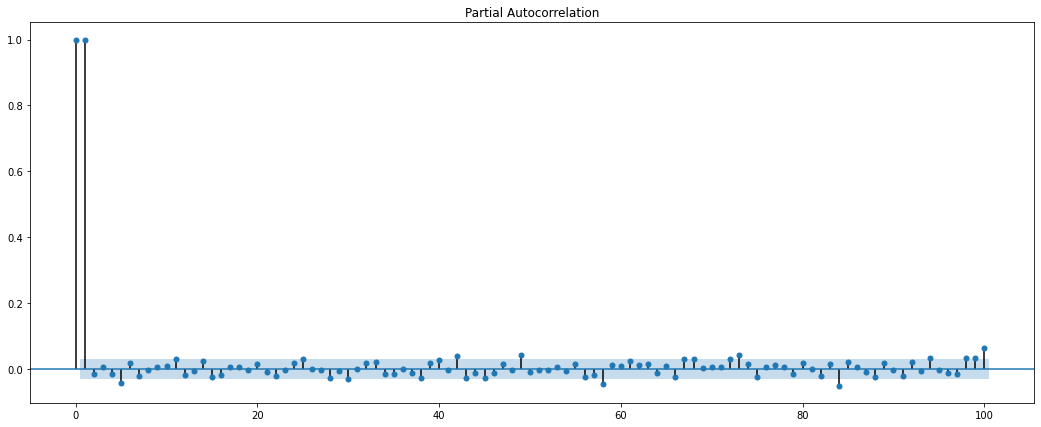

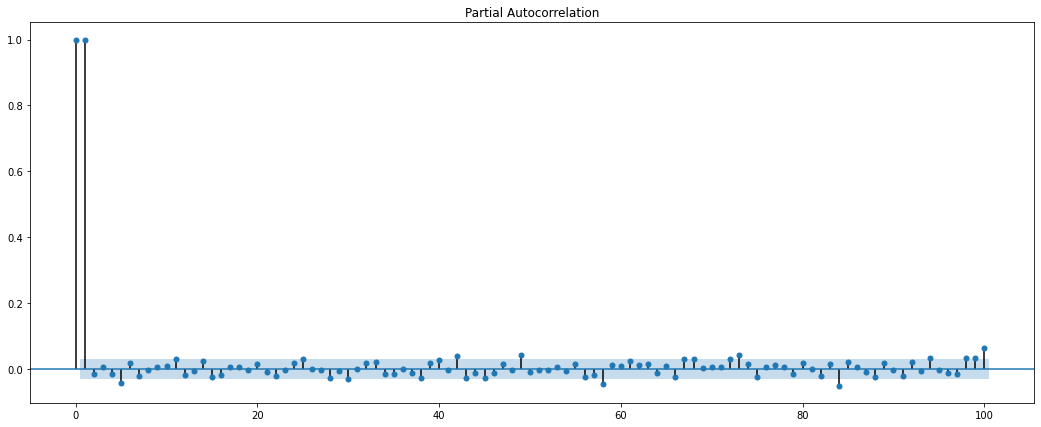

In [23]:
plot_pacf(combined_data['ETH-Close'],lags=100)

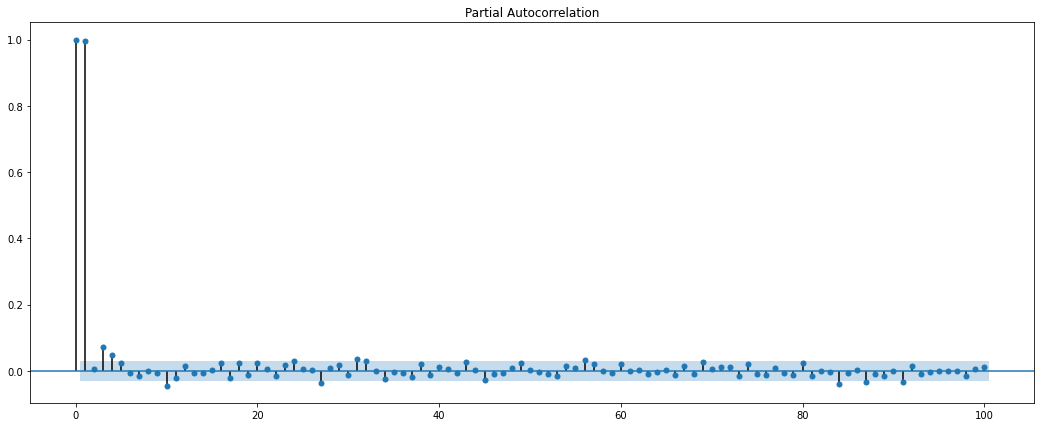

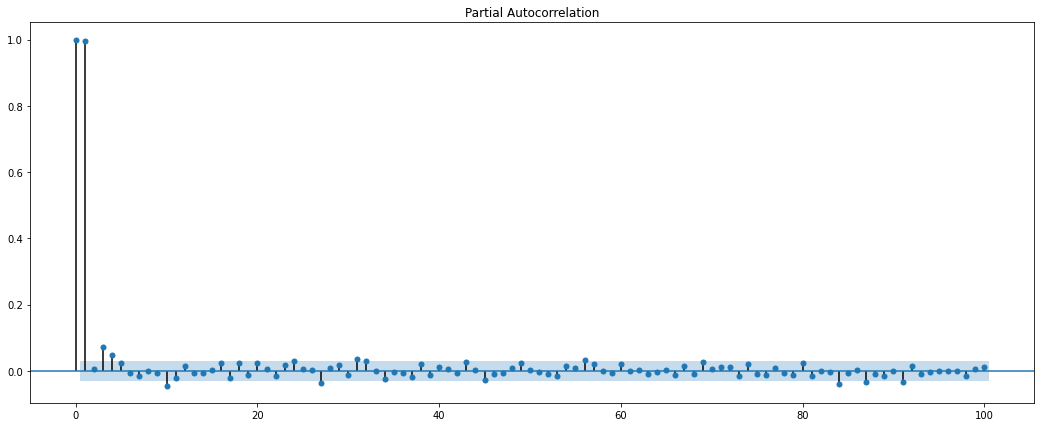

In [24]:
plot_pacf(combined_data['Doge-Close'],lags=100)

In [ ]:
# distribution of values

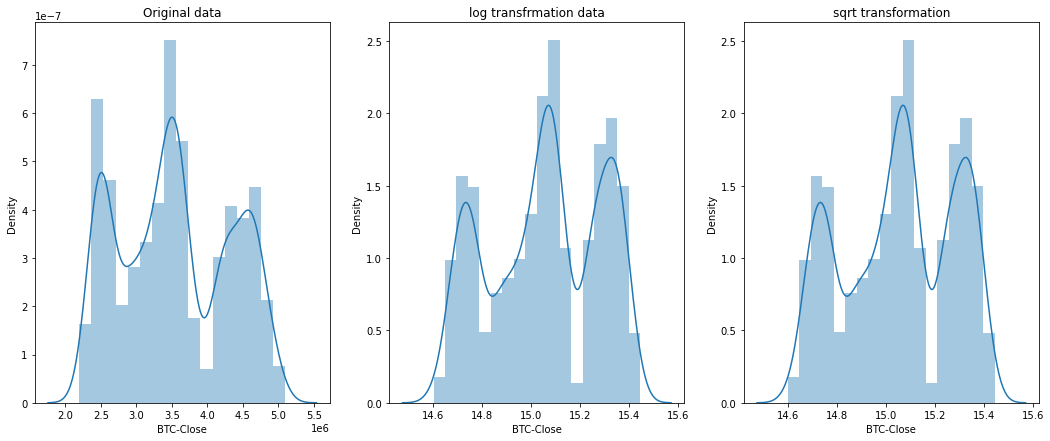

In [25]:
plt.subplot(1,3,1)
sns.distplot(combined_data['BTC-Close'])
plt.title('Original data')
plt.subplot(1,3,2)
sns.distplot(np.log(combined_data['BTC-Close']))
plt.title('log transfrmation data')
plt.subplot(1,3,3)
sns.distplot(np.log(combined_data['BTC-Close']))
plt.title('sqrt transformation')
plt.show()

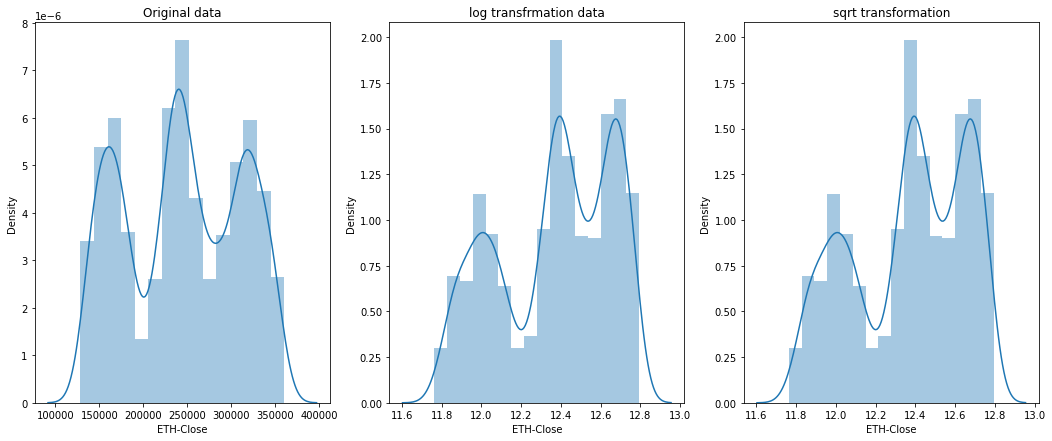

In [26]:
plt.subplot(1,3,1)
sns.distplot(combined_data['ETH-Close'])
plt.title('Original data')
plt.subplot(1,3,2)
sns.distplot(np.log(combined_data['ETH-Close']))
plt.title('log transfrmation data')
plt.subplot(1,3,3)
sns.distplot(np.log(combined_data['ETH-Close']))
plt.title('sqrt transformation')
plt.show()

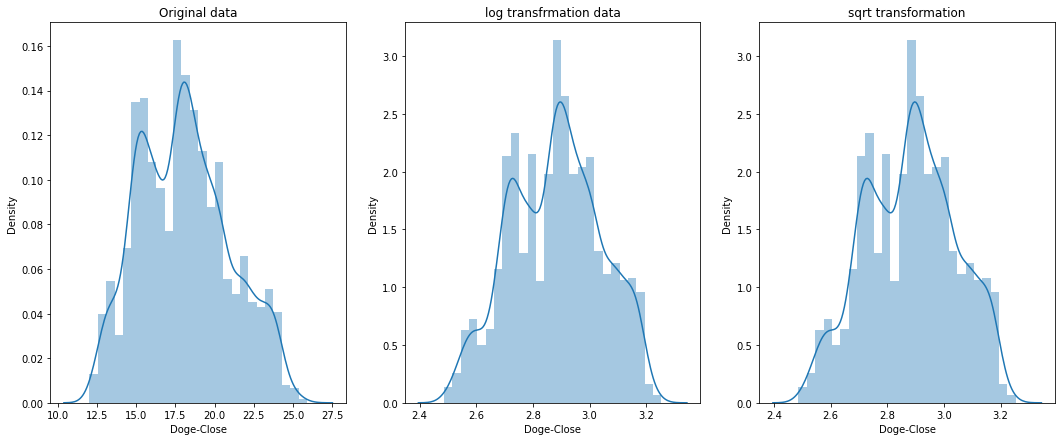

In [27]:
plt.subplot(1,3,1)
sns.distplot(combined_data['Doge-Close'])
plt.title('Original data')
plt.subplot(1,3,2)
sns.distplot(np.log(combined_data['Doge-Close']))
plt.title('log transfrmation data')
plt.subplot(1,3,3)
sns.distplot(np.log(combined_data['Doge-Close']))
plt.title('sqrt transformation')
plt.show()

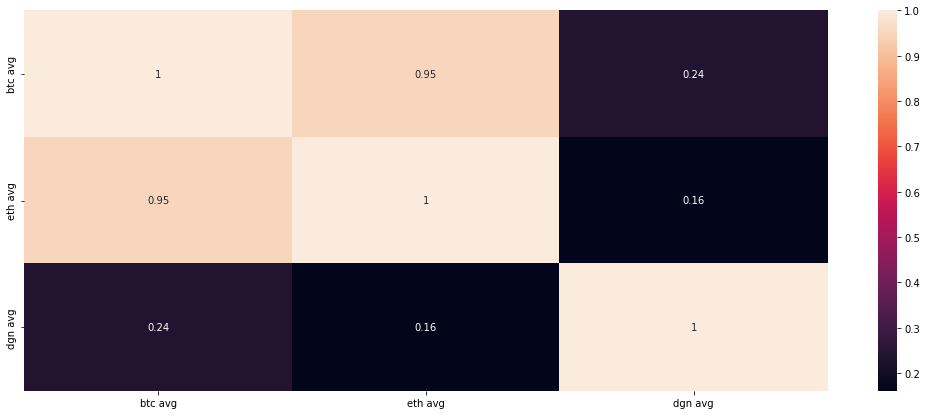

In [28]:
BTC['btc avg'] = (BTC['Open']+BTC['Close'])/2
BTC['eth avg'] = (ETH['Open']+ETH['Close'])/2
BTC['dgn avg'] = (Doge['Open']+Doge['Close'])/2
sns.heatmap(BTC.iloc[:,-3:].corr(),annot=True)

In [29]:
res = pd.read_excel('metrics.xlsx')
res

,Model_name,Crypto,Target,RMSE_training,RMSE_testing,MAPE_training,MAPE_testing,training_r2_Score,testing_r2_score
0,Single_LSTM,DOGE-INR,Close,0.015496,1.309740,1.210257,0.991827,0.968000,0.016218
1,Single_LSTM,BTC-INR,Close,0.029546,0.132824,0.530292,2.043755,0.997287,0.820846
2,Single_LSTM,BTC-INR,Close,0.030231,0.099484,0.559713,1.512807,0.997160,0.899497
3,Single_LSTM,BTC-INR,Close,0.029383,0.081806,0.530258,1.294163,0.997317,0.932042
4,Single_LSTM,BTC-INR,Avg price,0.018296,0.051632,0.335994,0.758085,0.998959,0.972853
5,Single_LSTM,BTC-INR,Close,0.018296,0.051632,0.335994,0.758085,0.998959,0.972853
6,Single_LSTM,ETH-INR,Close,0.009563,0.038517,0.818540,1.966649,0.997199,0.882075
7,Single_LSTM,ETH-INR,Close,0.010089,0.016611,0.841404,0.990713,0.997142,0.966189
8,Single_LSTM,ETH-INR,Avg price,0.011733,0.015792,1.059297,0.970924,0.996166,0.969523
9,Bi_LSTM,BTC-INR,Avg price,0.008972,0.014602,0.680993,0.810174,0.997086,0.966027


In [30]:
def update_result_set(mod,crypto,targ,rmse_tr,rmse_te,mape_tr,mape_te,r2_tr,r2_te):
  global res
  res = res.append({'Model_name':mod,'Crypto':crypto,'Target':targ,'RMSE_training':rmse_tr,'RMSE_testing':rmse_te,'MAPE_training':mape_tr,'MAPE_testing':mape_te,'training_r2_Score':r2_tr,'testing_r2_score':r2_te},ignore_index=True)


In [31]:
def performance_evaluation(train_actual,train_predicted,test_actual,test_predicted):
  print('RMSE for test data =',np.sqrt(mean_squared_error(test_actual,test_predicted)))
  print('RMSE for training data = ',np.sqrt(mean_squared_error(train_actual,train_predicted)))
  print('MAPE for trainig data =',mape(train_actual,train_predicted))
  print('MAPE for testing data=',mape(test_actual,test_predicted))
  print('coefficient of determinant testing data= ',r2_score(test_actual,test_predicted))
  print('coefficient of determinant for training data= ',r2_score(train_actual,train_predicted))


In [32]:
# Ticker is variable to store dictinory of all the cryptocurrencies we are going to predict
# 
# 
Ticker = {1:'BTC-INR',2:'ETH-INR',3:'DOGE-INR'}

print('please choose the dataset :[1 = BTC-INR,2 = ETH-INR,3= DOGE-INR]') # where 1,2,3 are index

index = int(input('Enter the index : '))

if index not in [1,2,3]:

    print('Please enter the valid index position!!!!')

else:
  
    print('You have choosen',Ticker[index])

please choose the dataset :[1 = BTC-INR,2 = ETH-INR,3= DOGE-INR]
Enter the index : 1
You have choosen BTC-INR


In [33]:
# we are choosing the data from
# using yfinance api we are fetching our data from browser
# Display last 5 records
'''if Ticker[index]!='DOGE-INR':
  start_date = '2019-09-18'
  df = yf.download(Ticker[index],start_date)
else:'''
df = yf.download(Ticker[index],period='6mo',interval='1h')
df.bfill(axis=0,inplace=True)

[*********************100%***********************]  1 of 1 completed


In [34]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
2021-12-10 14:00:00+00:00,3754469.750000,3766216.500000,3654204.250000,3654204.250000,3654204.250000,0
2021-12-10 15:00:00+00:00,3657223.000000,3676538.000000,3626712.500000,3633669.500000,3633669.500000,0
2021-12-10 16:00:00+00:00,3643071.250000,3643071.250000,3595336.750000,3606279.750000,3606279.750000,57976291328
2021-12-10 17:00:00+00:00,3601320.250000,3609948.000000,3592155.500000,3592918.250000,3592918.250000,17931698176
2021-12-10 17:36:56+00:00,3599539.000000,3599539.000000,3599539.000000,3599539.000000,3599539.000000,0


In [35]:
df = df.iloc[:-1,:]
df.tail()

,Open,High,Low,Close,Adj Close,Volume
2021-12-10 13:00:00+00:00,3716488.000000,3781403.000000,3699630.500000,3752640.500000,3752640.500000,74968465408
2021-12-10 14:00:00+00:00,3754469.750000,3766216.500000,3654204.250000,3654204.250000,3654204.250000,0
2021-12-10 15:00:00+00:00,3657223.000000,3676538.000000,3626712.500000,3633669.500000,3633669.500000,0
2021-12-10 16:00:00+00:00,3643071.250000,3643071.250000,3595336.750000,3606279.750000,3606279.750000,57976291328
2021-12-10 17:00:00+00:00,3601320.250000,3609948.000000,3592155.500000,3592918.250000,3592918.250000,17931698176


In [36]:
len(df)

4255

In [37]:
df.isna().sum() # checking for null values  Hopefully there is no nul values in dataset

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The volume here refers to the trade occurred on the respective day.
 It depends on the market sentiments for the particular currency. 
 Adjusted closed price is as similar as the close price which includes any corporate actions..
 (like dividend). The close price is inclusive of corporate actions. We are dropping the adj. closed price. 
 

In [38]:
# drop the volume and Adj Close column because we are not using this for analysis
df.drop(columns=['Volume','Adj Close'],inplace=True)
df['Avg price'] = (df['Open']+df['Close']) / 2 # Calculating average price
df.tail()


,Open,High,Low,Close,Avg price
2021-12-10 13:00:00+00:00,3716488.000000,3781403.000000,3699630.500000,3752640.500000,3734564.250000
2021-12-10 14:00:00+00:00,3754469.750000,3766216.500000,3654204.250000,3654204.250000,3704337.000000
2021-12-10 15:00:00+00:00,3657223.000000,3676538.000000,3626712.500000,3633669.500000,3645446.250000
2021-12-10 16:00:00+00:00,3643071.250000,3643071.250000,3595336.750000,3606279.750000,3624675.500000
2021-12-10 17:00:00+00:00,3601320.250000,3609948.000000,3592155.500000,3592918.250000,3597119.250000


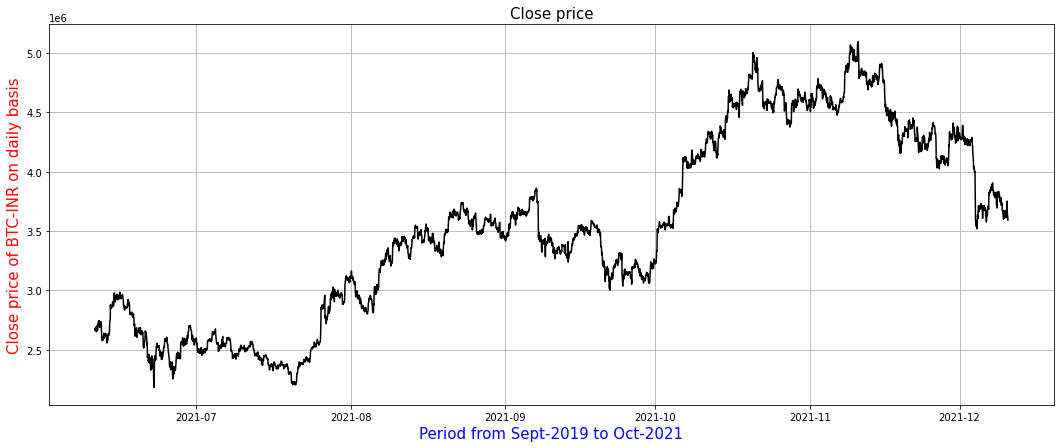

In [39]:
# plot Close price using line plot
# Plot Close price
# Plot title
# set x label name
# set y label name
# display the chart
plt.plot(df['Close'],color='black') 
plt.title('Close price',fontsize=15) 
plt.grid()
plt.xlabel('Period from Sept-2019 to Oct-2021',fontsize=15,color='b') 
plt.ylabel('Close price of '+Ticker[index]+' on daily basis',fontsize=15,color='r') 
plt.show() 

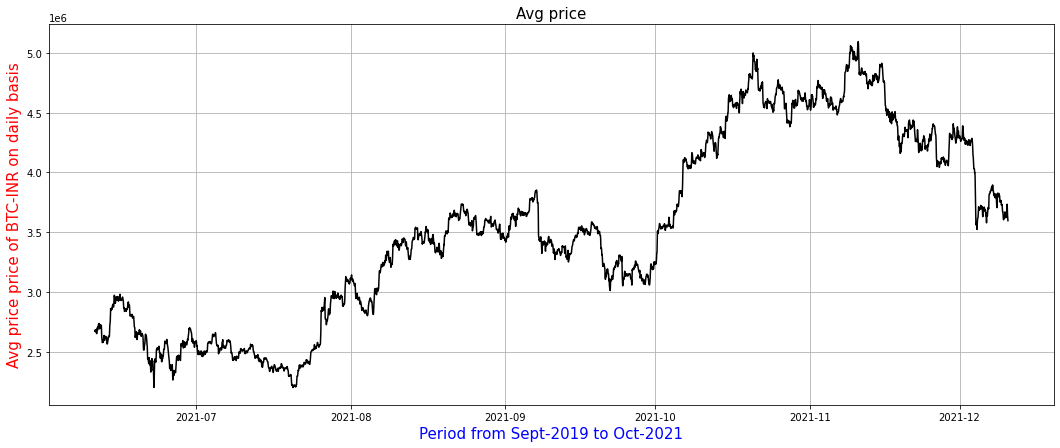

In [40]:
# plot Avg Price price
# plot Avg price using line plot
# Plot Avg price
# Plot title
# set x label name
# set y label name
# display the chart
plt.plot(df['Avg price'],color='black')
plt.title('Avg price',fontsize=15)
plt.grid()
plt.xlabel('Period from Sept-2019 to Oct-2021',fontsize=15,color='b')
plt.ylabel('Avg price price of '+Ticker[index]+' on daily basis',fontsize=15,color='r')
plt.show()

In [41]:
# select only Close and Avg Price
df = df.loc[:,['Close','Avg price']] 
df.tail()

,Close,Avg price
2021-12-10 13:00:00+00:00,3752640.500000,3734564.250000
2021-12-10 14:00:00+00:00,3654204.250000,3704337.000000
2021-12-10 15:00:00+00:00,3633669.500000,3645446.250000
2021-12-10 16:00:00+00:00,3606279.750000,3624675.500000
2021-12-10 17:00:00+00:00,3592918.250000,3597119.250000


In [42]:
Close = df['Close']
Avg_price = df['Avg price']

In [43]:
ind = df.index # storing time stamps for future purpose
ind

DatetimeIndex(['2021-06-10 17:00:00+00:00', '2021-06-10 18:00:00+00:00',
               '2021-06-10 19:00:00+00:00', '2021-06-10 20:00:00+00:00',
               '2021-06-10 21:00:00+00:00', '2021-06-10 22:00:00+00:00',
               '2021-06-11 00:00:00+00:00', '2021-06-11 01:00:00+00:00',
               '2021-06-11 02:00:00+00:00', '2021-06-11 03:00:00+00:00',
               ...
               '2021-12-10 08:00:00+00:00', '2021-12-10 09:00:00+00:00',
               '2021-12-10 10:00:00+00:00', '2021-12-10 11:00:00+00:00',
               '2021-12-10 12:00:00+00:00', '2021-12-10 13:00:00+00:00',
               '2021-12-10 14:00:00+00:00', '2021-12-10 15:00:00+00:00',
               '2021-12-10 16:00:00+00:00', '2021-12-10 17:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=4255, freq=None)

# Perform Scalling


In [44]:
# choose the target column which you want to proceed with analysis
# asking user to select the column
# if mentioned key not present in dict print error message
# else store the respective data in a variable price_list

target_col = {1:'Close',2:'Avg price'}
key = int(input('Choose target column (1 : Close , 2: Avg price)'))
if key not in target_col.keys():
  print('Please enter valid column!!!!')
else:
  price_list = np.array(df.loc[:,target_col[key]]).reshape(-1,1)

Choose target column (1 : Close , 2: Avg price)1


In [46]:
last = 100 # print tha data

In [47]:
target = np.array(price_list)
examine = price_list[-last:,0] # store this data to compare with last 30 predicted by our model
len(examine)

100

In [48]:
# transformation
#price_list = np.log(price_list)

In [49]:
# The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
# Initialize the Standard scaler object
# Create data frame on scaled data
# print last five records
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Std_scaler = MinMaxScaler()
price_list = pd.DataFrame(data=Std_scaler.fit_transform(price_list))
price_list.columns = [target_col[key]]
price_list.index = ind

In [ ]:
#price_list = np.log(price_list)

In [50]:
target_col[key]

'Close'

In [51]:
price_list.tail()

,Close
2021-12-10 13:00:00+00:00,0.538808
2021-12-10 14:00:00+00:00,0.505057
2021-12-10 15:00:00+00:00,0.498017
2021-12-10 16:00:00+00:00,0.488626
2021-12-10 17:00:00+00:00,0.484044


In [52]:
scaled_data = price_list

In [53]:
print('len of examine :',len(examine))
print('len of price list before :',len(price_list))

len of examine : 100
len of price list before : 4255


In [54]:
price_list = price_list.iloc[:-last,:]

In [55]:
print('len of price list after :',len(price_list))

len of price list after : 4155


In [56]:
price_list = np.array(price_list)

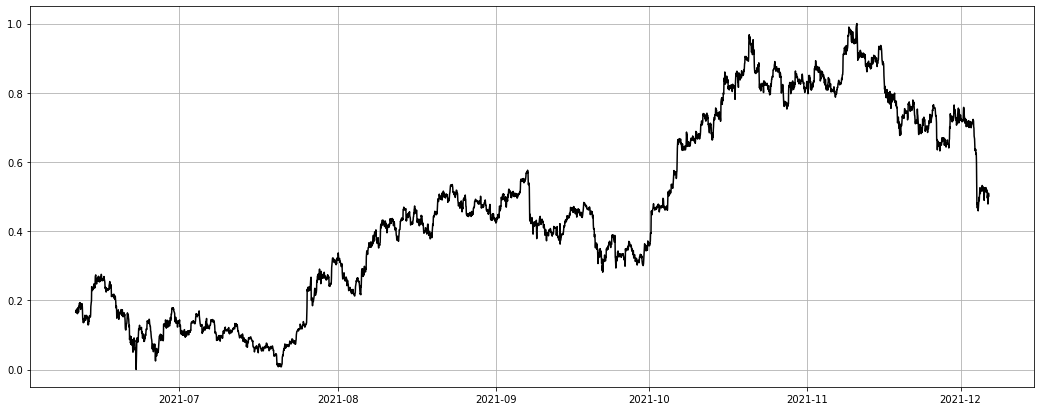

In [57]:
 # plot tha data
plt.plot(ind[:-last],price_list,color='black')
plt.grid()

In [58]:
def plot_loss(hist_val):
  plt.plot(hist_val.history['loss'],color='black',label='training loss')
  plt.plot(hist_val.history['val_loss'],color='red',label='validation loss')
  plt.title('Loss vs Val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('Error/ Loss')
  plt.legend()
  plt.show()

def pred_vs_actual(actual,predicted):
    plt.plot(actual,color='black',label='Actual')
    plt.plot(predicted,color='red',label='Predicted')
    plt.title('Actual  vs predicted')
    plt.legend()
    plt.show()

In [59]:
# function is to test our model based on test data that we stored 
def forecast_future(inputs,no_hours,ts,model):
  forecast = []
  i = 0
  while i<no_hours:    
    if len(inputs)>ts:
      X_inp = np.array(inputs[1:])
      #print('Input',i+1," : ",X_inp)
      X_inp = X_inp.reshape(-1,1)
      X_inp = X_inp.reshape(1,ts,1)
      y_hat = model.predict(X_inp)
      #print('Forecasted value :',y_hat)
      inputs.extend(y_hat[0]) # 32
      inputs = inputs[1:] #31
      forecast.extend(y_hat.tolist())
    else:
      X_inp = X_input.reshape((1,X_input.shape[0],X_input.shape[1]))
      y_hat = model.predict(X_inp,verbose=1)
      #print('Input',i+1," : ",X_inp.reshape(1,30))
      #print('Forecasted value :',y_hat)
      inputs.extend(y_hat[0])
      forecast.extend(y_hat.tolist())
    i= i+1 
  return forecast

In [60]:
# function to visualize last 100 original data + 30 predicted data by our model
def plot_latest(target_column,length,forecasted,future):
  day_past = np.arange(1,101)
  day_pred = np.arange(101,101+future)
  past_data = np.array(target_column)[length-100:,]
  plt.plot(day_past,past_data,color='black',label='Past')
  plt.plot(day_pred,forecasted,color='red',label='Future')
  s = 'past 100 vs future' + str(future)
  plt.title(s)
  plt.legend()
  plt.show()
  collection = list(past_data)
  collection.extend(forecasted)
  plt.plot(collection,color='green')
  plt.show()

In [61]:
# function forecast future records of a crypto i.e data that not available in collected dataset
def see_future(inputs,no_hours,ts,model,X_input):
  forecast = []
  i = 0
  while i<no_hours:    
    if len(inputs)>ts:
      X_inp = np.array(inputs[1:])
      #print('Input',i+1," : ",X_inp)
      X_inp = X_inp.reshape(-1,1)
      X_inp = X_inp.reshape(1,ts,1)
      y_hat = model.predict(X_inp)
      #print('Forecasted value :',y_hat)
      inputs.extend(y_hat[0])
      inputs = inputs[1:]
      forecast.extend(y_hat.tolist())
    else:
      X_inp = X_input.reshape((1,X_input.shape[0],X_input.shape[1]))
      y_hat = model.predict(X_inp,verbose=1)
      #print('Input',i+1," : ",X_inp.reshape(1,30))
      #print('Forecasted value :',y_hat)
      inputs.extend(y_hat[0])
      forecast.extend(y_hat.tolist())
    i= i+1 
  return forecast

In [62]:
# full plot : collected plus forecasted values will be visualized through thos function
def prediction(target_column,forecasted,records):
  final_data = list(np.array(target_column))
  final_data.extend(forecasted) # add future f days
  future_days = pd.date_range(ind[-1],periods=records+1,freq='1H')[1:]
  #print(future_days)
  dates = list(ind)
  dates.extend(list(future_days))
  plt.plot(dates,final_data)
  #data = pd.DataFrame(data={'values':np.array(final_data)})
  s = 'Final plot'
  plt.title(s)
  plt.grid()
  plt.show()

In [63]:
#mape function will give mean absolute percentage error for actual and predicted data
def mape(act,pred):
  return  np.mean(np.abs(((act-pred)/act)))*100

# Train Test Split

In [64]:
# take 75 per of data for training and rest for testing and print them accordingly
train_size = round(len(price_list)*0.70)
test_size = round(len(price_list) - train_size)
print('training data size :',train_size)
print('test data size :',test_size)

training data size : 2908
test data size : 1247


In [65]:
# split the data into training and testing based on size we have choose
# And print the shape of both train and test data
train_data = price_list[:train_size,:]
test_data = price_list[train_size:,:]
print('train data :',train_data.shape)
print('test data :',test_data.shape)

train data : (2908, 1)
test data : (1247, 1)


In [66]:
# Creating column name for the number of days that your considering to predicting next day price of crypto
# using for loop and with help of strings and list we are doing this process
col=[]
for i in range(100):
  s='T'+str(i+1)
  col.append(s)
col.append('Target')


In [67]:
# create a user defined process to create the dataset for train and test accordingly
# Here I'm considering past 30 days record to predict next day price of a crypto
# this function return two variables Test and train array
def create_dataset(dataset,step):
  data_X,data_y =[],[]
  for i in range(len(dataset)-step-1):
    get_val = dataset[i:(i+step),0]
    data_X.append(get_val)
    data_y.append(dataset[i+step,0])
  return np.array(data_X),np.array(data_y)


time_step = 100 # considering past 30 days record to predict next day data
X_train,y_train = create_dataset(train_data,time_step) # Call the user defined price
X_test,y_test = create_dataset(test_data,time_step) # Call the user defined price

In [68]:
# just for visualizing the data 
# we are creating this cell block and variables to show how our training and testing data.
Train_X = pd.DataFrame(data=X_train) 
Train_Y = pd.Series(y_train)
Train_dataset = pd.concat([Train_X,Train_Y],axis=1)
Train_dataset = pd.DataFrame(data=Train_dataset.values,columns=col)
print('********************************************************************Training Data ***************************************************')
Train_dataset

********************************************************************Training Data ***************************************************


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40,...,T62,T63,T64,T65,T66,T67,T68,T69,T70,T71,T72,T73,T74,T75,T76,T77,T78,T79,T80,T81,T82,T83,T84,T85,T86,T87,T88,T89,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99,T100,Target
0,0.167059,0.171387,0.171187,0.163919,0.169115,0.175085,0.167447,0.161438,0.161969,0.171910,0.178029,0.179392,0.165674,0.182761,0.179433,0.181135,0.191077,0.189688,0.188631,0.193485,0.189012,0.178386,0.173735,0.179489,0.185194,0.188262,0.185967,0.179924,0.190464,0.181726,0.164262,0.144573,0.146479,0.136167,0.135290,0.139049,0.138944,0.137262,0.137834,0.149018,...,0.152325,0.155871,0.153487,0.153707,0.153185,0.151699,0.158146,0.182058,0.189708,0.194420,0.197780,0.239499,0.229749,0.227978,0.234034,0.235420,0.230851,0.230853,0.235884,0.241222,0.245575,0.244530,0.247889,0.236053,0.240625,0.236062,0.245344,0.268646,0.271503,0.273523,0.258893,0.261771,0.250739,0.247278,0.250785,0.262859,0.260321,0.266046,0.255762,0.262394
1,0.171387,0.171187,0.163919,0.169115,0.175085,0.167447,0.161438,0.161969,0.171910,0.178029,0.179392,0.165674,0.182761,0.179433,0.181135,0.191077,0.189688,0.188631,0.193485,0.189012,0.178386,0.173735,0.179489,0.185194,0.188262,0.185967,0.179924,0.190464,0.181726,0.164262,0.144573,0.146479,0.136167,0.135290,0.139049,0.138944,0.137262,0.137834,0.149018,0.146165,...,0.155871,0.153487,0.153707,0.153185,0.151699,0.158146,0.182058,0.189708,0.194420,0.197780,0.239499,0.229749,0.227978,0.234034,0.235420,0.230851,0.230853,0.235884,0.241222,0.245575,0.244530,0.247889,0.236053,0.240625,0.236062,0.245344,0.268646,0.271503,0.273523,0.258893,0.261771,0.250739,0.247278,0.250785,0.262859,0.260321,0.266046,0.255762,0.262394,0.265409
2,0.171187,0.163919,0.169115,0.175085,0.167447,0.161438,0.161969,0.171910,0.178029,0.179392,0.165674,0.182761,0.179433,0.181135,0.191077,0.189688,0.188631,0.193485,0.189012,0.178386,0.173735,0.179489,0.185194,0.188262,0.185967,0.179924,0.190464,0.181726,0.164262,0.144573,0.146479,0.136167,0.135290,0.139049,0.138944,0.137262,0.137834,0.149018,0.146165,0.156631,...,0.153487,0.153707,0.153185,0.151699,0.158146,0.182058,0.189708,0.194420,0.197780,0.239499,0.229749,0.227978,0.234034,0.235420,0.230851,0.230853,0.235884,0.241222,0.245575,0.244530,0.247889,0.236053,0.240625,0.236062,0.245344,0.268646,0.271503,0.273523,0.258893,0.261771,0.250739,0.247278,0.250785,0.262859,0.260321,0.266046,0.255762,0.262394,0.265409,0.269578
3,0.163919,0.169115,0.175085,0.167447,0.161438,0.161969,0.171910,0.178029,0.179392,0.165674,0.182761,0.179433,0.181135,0.191077,0.189688,0.188631,0.193485,0.189012,0.178386,0.173735,0.179489,0.185194,0.188262,0.185967,0.179924,0.190464,0.181726,0.164262,0.144573,0.146479,0.136167,0.135290,0.139049,0.138944,0.137262,0.137834,0.149018,0.146165,0.156631,0.156372,...,0.153707,0.153185,0.151699,0.158146,0.182058,0.189708,0.194420,0.197780,0.239499,0.229749,0.227978,0.234034,0.235420,0.230851,0.230853,0.235884,0.241222,0.245575,0.244530,0.247889,0.236053,0.240625,0.236062,0.245344,0.268646,0.271503,0.273523,0.258893,0.261771,0.250739,0.247278,0.250785,0.262859,0.260321,0.266046,0.255762,0.262394,0.265409,0.269578,0.265626
4,0.169115,0.175085,0.167447,0.161438,0.161969,0.171910,0.178029,0.179392,0.165674,0.182761,0.179433,0.181135,0.191077,0.189688,0.188631,0.193485,0.189012,0.178386,0.173735,0.179489,0.185194,0.188262,0.185967,0.179924,0.190464,0.181726,0.164262,0.144573,0.146479,0.136167,0.135290,0.139049,0.138944,0.137262,0.137834,0.149018,0.146165,0.156631,0.156372,0.148307,...,0.153185,0.151699,0.158146,0.182058,0.189708,0.194420,0.197780,0.239499,0.229749,0.227978,0.234034,0.235420,0.230851,0.230853,0.235884,0.241222,0.245575,0.244530,0.247889,0.236053,0.240625,0.236062,0.245344,0.268646,0.271503,0.273523,0.258893,0.261771,0.250739,0.247278,0.250785,0.262859,0.260321,0.266046,0.255762,0.262394,0.265409,0.269578,0.265626,0.265088
...,...,...,...,...,...,...,...,...,...,...,...,..

In [69]:
Test_X = pd.DataFrame(data=X_test)
Test_Y = pd.Series(y_test)
Test_dataset = pd.concat([Test_X,Test_Y],axis=1)
Test_dataset = pd.DataFrame(data=Test_dataset.values,columns=col)
print('*********************************************************************Test Data***************************************************')
Test_dataset

*********************************************************************Test Data***************************************************


,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28,T29,T30,T31,T32,T33,T34,T35,T36,T37,T38,T39,T40,...,T62,T63,T64,T65,T66,T67,T68,T69,T70,T71,T72,T73,T74,T75,T76,T77,T78,T79,T80,T81,T82,T83,T84,T85,T86,T87,T88,T89,T90,T91,T92,T93,T94,T95,T96,T97,T98,T99,T100,Target
0,0.730171,0.736932,0.734367,0.717596,0.723901,0.773377,0.779217,0.782540,0.782315,0.785748,0.775322,0.766350,0.778809,0.776367,0.779934,0.778323,0.799536,0.795921,0.795833,0.831458,0.842716,0.836474,0.831950,0.860092,0.824612,0.826083,0.828516,0.828033,0.835843,0.833039,0.839111,0.848132,0.841286,0.837642,0.831808,0.829688,0.834602,0.837647,0.810939,0.818152,...,0.815626,0.817770,0.817858,0.813345,0.817705,0.819761,0.817953,0.806361,0.780955,0.809332,0.827221,0.856185,0.852963,0.849223,0.853935,0.861846,0.862211,0.861343,0.850696,0.846811,0.831791,0.836913,0.824707,0.815663,0.850049,0.857627,0.854202,0.848125,0.848138,0.848517,0.837672,0.837151,0.846208,0.853162,0.848496,0.845888,0.842796,0.863730,0.857609,0.856002
1,0.736932,0.734367,0.717596,0.723901,0.773377,0.779217,0.782540,0.782315,0.785748,0.775322,0.766350,0.778809,0.776367,0.779934,0.778323,0.799536,0.795921,0.795833,0.831458,0.842716,0.836474,0.831950,0.860092,0.824612,0.826083,0.828516,0.828033,0.835843,0.833039,0.839111,0.848132,0.841286,0.837642,0.831808,0.829688,0.834602,0.837647,0.810939,0.818152,0.814554,...,0.817770,0.817858,0.813345,0.817705,0.819761,0.817953,0.806361,0.780955,0.809332,0.827221,0.856185,0.852963,0.849223,0.853935,0.861846,0.862211,0.861343,0.850696,0.846811,0.831791,0.836913,0.824707,0.815663,0.850049,0.857627,0.854202,0.848125,0.848138,0.848517,0.837672,0.837151,0.846208,0.853162,0.848496,0.845888,0.842796,0.863730,0.857609,0.856002,0.849665
2,0.734367,0.717596,0.723901,0.773377,0.779217,0.782540,0.782315,0.785748,0.775322,0.766350,0.778809,0.776367,0.779934,0.778323,0.799536,0.795921,0.795833,0.831458,0.842716,0.836474,0.831950,0.860092,0.824612,0.826083,0.828516,0.828033,0.835843,0.833039,0.839111,0.848132,0.841286,0.837642,0.831808,0.829688,0.834602,0.837647,0.810939,0.818152,0.814554,0.817112,...,0.817858,0.813345,0.817705,0.819761,0.817953,0.806361,0.780955,0.809332,0.827221,0.856185,0.852963,0.849223,0.853935,0.861846,0.862211,0.861343,0.850696,0.846811,0.831791,0.836913,0.824707,0.815663,0.850049,0.857627,0.854202,0.848125,0.848138,0.848517,0.837672,0.837151,0.846208,0.853162,0.848496,0.845888,0.842796,0.863730,0.857609,0.856002,0.849665,0.855957
3,0.717596,0.723901,0.773377,0.779217,0.782540,0.782315,0.785748,0.775322,0.766350,0.778809,0.776367,0.779934,0.778323,0.799536,0.795921,0.795833,0.831458,0.842716,0.836474,0.831950,0.860092,0.824612,0.826083,0.828516,0.828033,0.835843,0.833039,0.839111,0.848132,0.841286,0.837642,0.831808,0.829688,0.834602,0.837647,0.810939,0.818152,0.814554,0.817112,0.809381,...,0.813345,0.817705,0.819761,0.817953,0.806361,0.780955,0.809332,0.827221,0.856185,0.852963,0.849223,0.853935,0.861846,0.862211,0.861343,0.850696,0.846811,0.831791,0.836913,0.824707,0.815663,0.850049,0.857627,0.854202,0.848125,0.848138,0.848517,0.837672,0.837151,0.846208,0.853162,0.848496,0.845888,0.842796,0.863730,0.857609,0.856002,0.849665,0.855957,0.855053
4,0.723901,0.773377,0.779217,0.782540,0.782315,0.785748,0.775322,0.766350,0.778809,0.776367,0.779934,0.778323,0.799536,0.795921,0.795833,0.831458,0.842716,0.836474,0.831950,0.860092,0.824612,0.826083,0.828516,0.828033,0.835843,0.833039,0.839111,0.848132,0.841286,0.837642,0.831808,0.829688,0.834602,0.837647,0.810939,0.818152,0.814554,0.817112,0.809381,0.808332,...,0.817705,0.819761,0.817953,0.806361,0.780955,0.809332,0.827221,0.856185,0.852963,0.849223,0.853935,0.861846,0.862211,0.861343,0.850696,0.846811,0.831791,0.836913,0.824707,0.815663,0.850049,0.857627,0.854202,0.848125,0.848138,0.848517,0.837672,0.837151,0.846208,0.853162,0.848496,0.845888,0.842796,0.863730,0.857609,0.856002,0.849665,0.855957,0.855053,0.849810
...,...,...,...,...,...,...,...,...,...,...,...,..

# 8.Build a model , fit data into model and train a model and compile 

In [ ]:
#X_train.reshape(X_train.shape[0],1,X_train.shape[1])

In [ ]:
#X_input_training = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
#X_input_testing = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [70]:
# since LSTM model accept the input in 3D shape
# so we have to reshape our data accordingly
X_train_Single_LSTM = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_Single_LSTM = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [71]:
X_train_Stacked_LSTM = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_Stacked_LSTM = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [72]:
X_train_Bd_LSTM = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_Bd_LSTM = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [73]:
X_train.shape

(2807, 100)

Single LSTM Model

In [74]:
# two types of Keras model 1:Sequential 2:Functional
def Single_LSTM(x_training,x_testing,y_training,y_testing):
  model = Sequential()
  model.add(LSTM(units=50,input_shape=(100,1)))
  #model.add(Activation('tanh'))
  model.add(Dense(units=1))
  #model.add(Activation('linear'))
  model.compile(loss='mse',optimizer='adam')
  print(model.summary())
  history = model.fit(x_training,y_training,validation_data=(x_testing,y_testing),epochs=100,batch_size=64,verbose=1)
  return history,model



In [75]:
Single_LSTM_history,Single_LSTM_model = Single_LSTM(X_train_Single_LSTM,X_test_Single_LSTM,y_train,y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
44/44 [==============================] - 7s 38ms/step - loss: 0.0094 - val_loss: 0.0030
Epoch 2/100
44/44 [==============================] - 1s 25ms/step - loss: 3.8529e-04 - val_loss: 5.3030e-04
Epoch 3/100
44/44 [==============================] - 1s 29ms/step - loss: 2.9524e-04 - val_loss: 5.1254e-04
Epoch 4/100
44/44 [==============================] - 1s 25ms/step - loss: 2.8948e-04 - val_loss: 5.2404e-04
Epoch 5/100
44/44 [

In [ ]:
#Single_LSTM_model.reset_states()
#Single_LSTM_model.reset_metrics()

In [ ]:
# Stacked LSTM

In [76]:
def Stacked_LSTM(x_training,x_testing,y_training,y_testing):
  model = Sequential()
  model.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))
  #model.add(Dropout(0.2))
  model.add(LSTM(units=50,return_sequences=True))
  #model.add(Dropout(0.2))
  model.add(LSTM(units=50))
  model.add(Dense(units=1))
  #model.add(Activation('linear'))
  model.compile(loss='mse',optimizer='adam')
  print(model.summary())
  history = model.fit(x_training,y_training,validation_data=(x_testing,y_testing),epochs=100,batch_size=64,verbose=1)
  return history,model

In [77]:
Stacked_LSTM_history,Stacked_LSTM_model = Stacked_LSTM(X_train_Stacked_LSTM,X_test_Stacked_LSTM,y_train,y_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
44/44 [==============================] - 11s 111ms/step - loss: 0.0113 - val_loss: 0.0031
Epoch 2/100
44/44 [==============================] - 3s 79ms/step - loss: 6

In [78]:
#Stacked_LSTM_model.reset_states()
#Stacked_LSTM_model.reset_metrics()

In [79]:
# Bidirectional LSTM

In [80]:
def Bidirectional_LSTM(x_training,x_testing,y_training,y_testing):
  model = Sequential()
  model.add(Bidirectional(LSTM(units=50,input_shape=(100,1),return_sequences=True)))  #
  model.add(Dropout(0.2))
  model.add(Bidirectional(LSTM(units=50)))
  #model.add(Dropout(0.2))
  #model.add(Bidirectional(LSTM(units=50)))
  model.add(Dense(units=1))
  #model.add(Activation('linear'))
  model.compile(loss='mse',optimizer='adam')
  model.build((x_training.shape))
  print(model.summary())
  history = model.fit(x_training,y_training,validation_data=(x_testing,y_testing),epochs=100,batch_size=64,verbose=1)
  return history,model

In [81]:
#Bidirectional_LSTM_model.reset_states()
#Bidirectional_LSTM_model.reset_metrics()


In [82]:
Bidirectional_LSTM_history,Bidirectional_LSTM_model = Bidirectional_LSTM(X_train_Bd_LSTM,X_test_Bd_LSTM,y_train,y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (2807, 100, 100)         20800     
 l)                                                              
                                                                 
 dropout (Dropout)           (2807, 100, 100)          0         
                                                                 
 bidirectional_1 (Bidirectio  (2807, 100)              60400     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (2807, 1)                 101       
                                                                 
Total params: 81,301
Trainable params: 81,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
44/44 [==========================

**plot Single LSTM training**

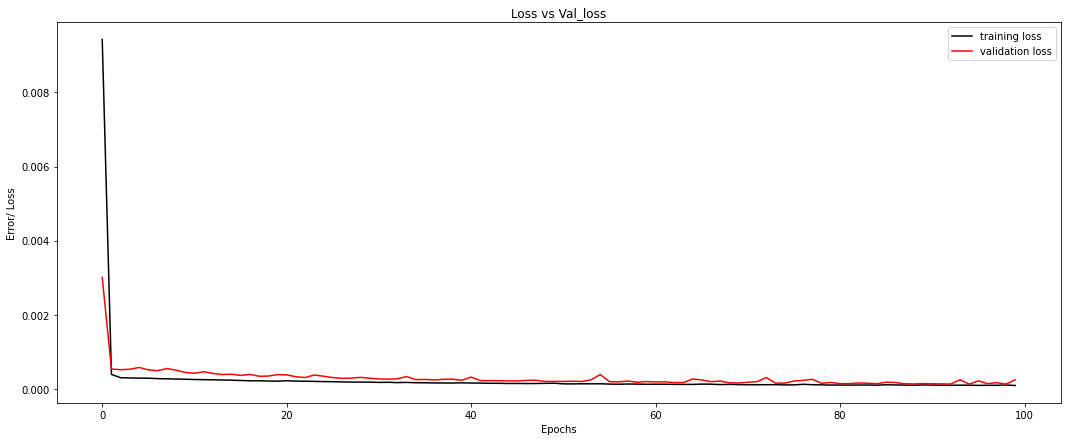

In [83]:
plot_loss(Single_LSTM_history)


plot Stacked LSTM training

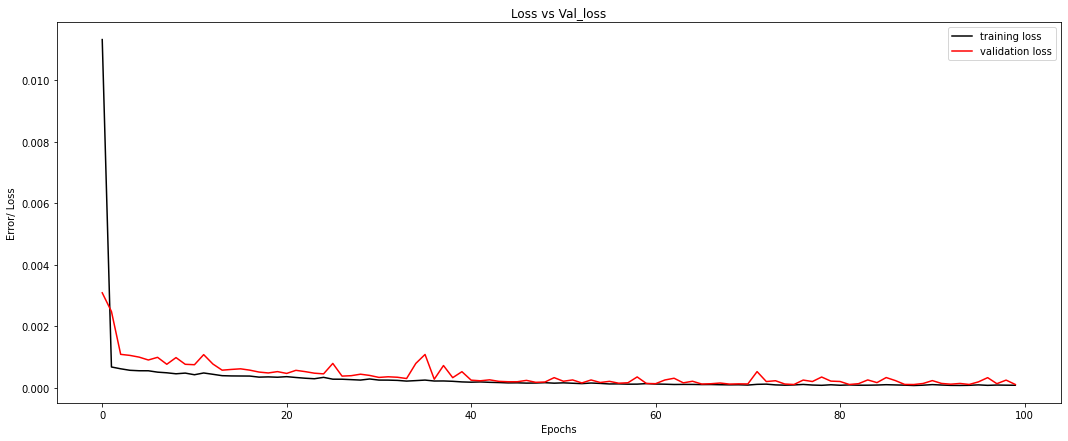

In [84]:
plot_loss(Stacked_LSTM_history)

Plot Bidirectional LSTM training

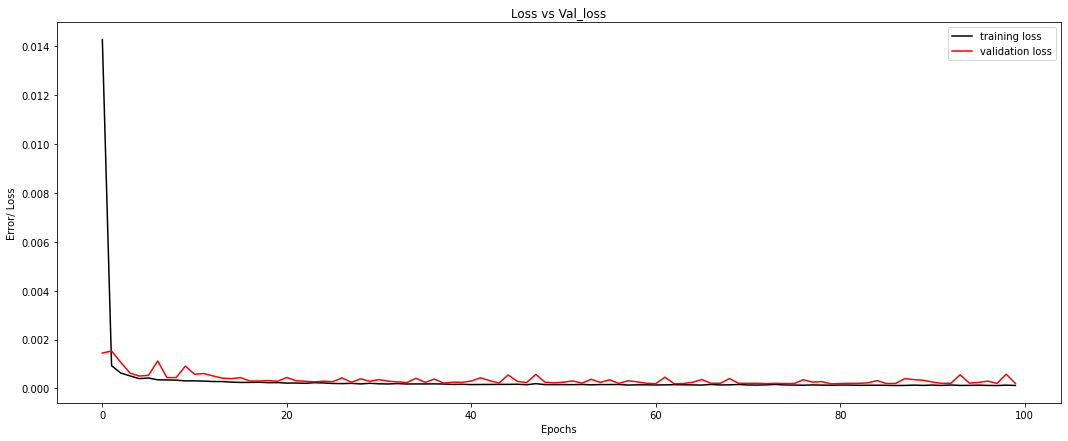

In [85]:
plot_loss(Bidirectional_LSTM_history)

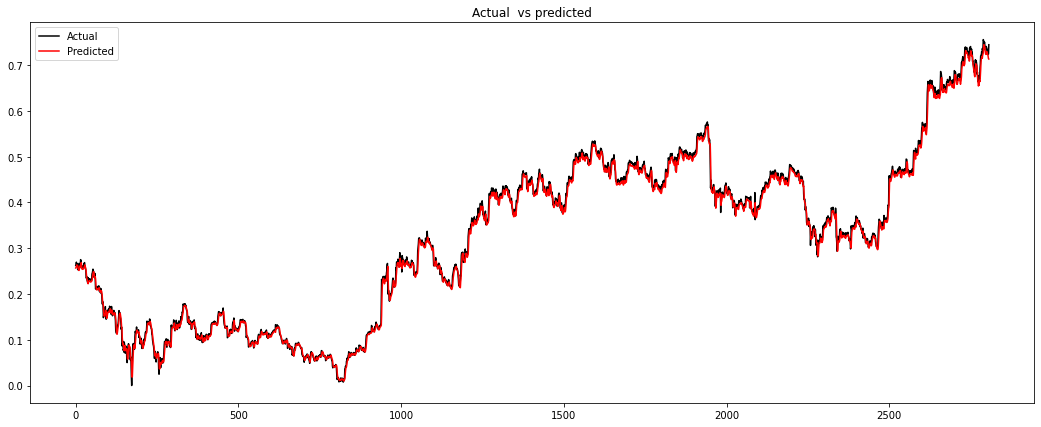

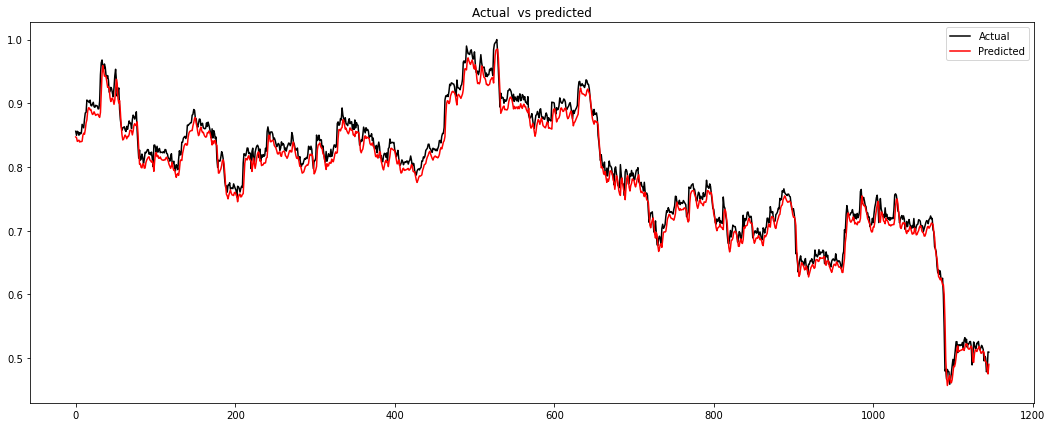

In [138]:

y_train_pred = Single_LSTM_model.predict(X_train_Single_LSTM)
y_test_pred = Single_LSTM_model.predict(X_test_Single_LSTM)
# calling tis function to showhow our model performed agains actual training and testing data
pred_vs_actual(y_train,y_train_pred)
pred_vs_actual(y_test,y_test_pred)

In [87]:
# test My Model

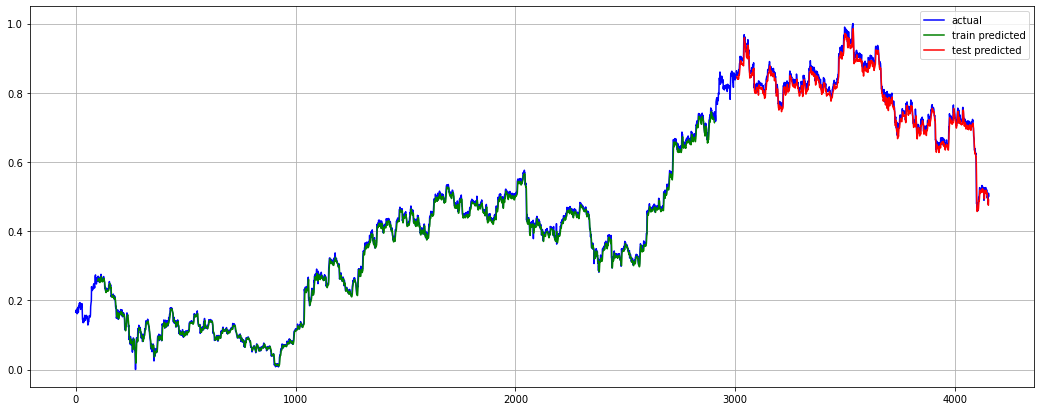

In [139]:
time_step=100
trainPredictPlot = np.empty_like(price_list)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(X_train)+time_step, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_list)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(X_train)+(time_step*2)+1:len(price_list)-1, :] = y_test_pred

# plot baseline and predictions
plt.plot(price_list,label='actual',color='blue')
plt.plot(trainPredictPlot,label='train predicted',color='green')
plt.plot(testPredictPlot,label='test predicted',color='red')
plt.legend()
plt.grid()
plt.show()

In [89]:
#predict_examine_data = Single_LSTM_model.predict(X_train)

In [90]:
# Consider last 30 days record :
# fetch last 30 days record from test_data  : 
# X_input = test_data[len(test_data)-step:]
# reshape it to 3 d data
# forecasted = []
# predict for X_input = yhat
# X_input [ 1-----30-31]

In [140]:
X_input = test_data[len(test_data)-time_step:]
temp_input = list(X_input.reshape(time_step))
print(X_input.shape)
len(temp_input)

(100, 1)


100

# 9. Predict the future close price

In [141]:
# calling forecast_future to forecast the data for 100 records and comare it with actual test data
forecasted_values = forecast_future(temp_input,last,time_step,Single_LSTM_model)

1/1 [==============================] - 0s 25ms/step


In [142]:
Actual_forecast = Std_scaler.inverse_transform(forecasted_values)
#Actual_forecast = np.exp(forecasted_values)

In [143]:
examine

array([3629035.  , 3685996.25, 3700671.75, 3695344.75, 3713257.75,
       3706560.75, 3682525.25, 3770533.5 , 3825823.5 , 3807895.25,
       3825893.75, 3820435.  , 3824323.75, 3845030.  , 3838432.75,
       3838053.  , 3855214.75, 3843628.25, 3872302.75, 3866509.5 ,
       3874847.75, 3888832.75, 3842412.75, 3852764.25, 3884772.  ,
       3906484.5 , 3868994.25, 3854831.25, 3844127.75, 3847103.5 ,
       3805752.75, 3814297.25, 3798920.75, 3823754.  , 3826073.75,
       3806975.5 , 3794841.5 , 3782265.5 , 3796290.75, 3809337.5 ,
       3826472.  , 3814704.  , 3809932.  , 3789535.25, 3723071.25,
       3716838.25, 3717197.75, 3694414.  , 3829147.5 , 3825169.75,
       3803792.  , 3794636.5 , 3819629.75, 3802793.25, 3834886.  ,
       3820146.25, 3780374.  , 3809085.  , 3810015.  , 3789649.25,
       3758446.5 , 3746523.75, 3760956.  , 3759267.25, 3753020.75,
       3781771.75, 3747298.75, 3717775.  , 3732536.5 , 3736386.5 ,
       3736804.75, 3727322.75, 3674144.75, 3669106.  , 3678904

In [144]:
result1 = pd.DataFrame(data={'Actual':examine,'predicted':Actual_forecast[:,0]})
result1['difference'] = np.abs(result1.Actual - result1.predicted)
result1

,Actual,predicted,difference
0,3629035.000000,3638203.490829,9168.490829
1,3685996.250000,3629346.559867,56649.690133
2,3700671.750000,3617312.134516,83359.615484
3,3695344.750000,3603628.117073,91716.632927
4,3713257.750000,3589194.055887,124063.694113
...,...,...,...
95,3752640.500000,2783085.737889,969554.762111
96,3654204.250000,2777760.505541,876443.744459
97,3633669.500000,2772487.034815,861182.465185
98,3606279.750000,2767264.717265,839015.032735


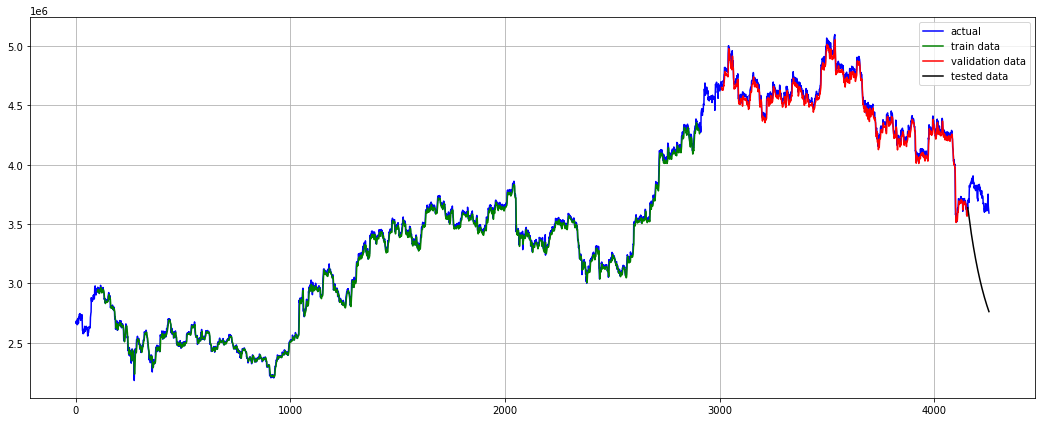

In [145]:
time_step=100
# trained
trainPredictPlot = np.empty_like(target)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(X_train)+time_step, :] = Std_scaler.inverse_transform(y_train_pred)

# shift test predictions for plotting
# validated
testPredictPlot = np.empty_like(target)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(X_train)+(time_step*2)+1:len(price_list)-1, :] = Std_scaler.inverse_transform(y_test_pred)


# predicted
predicted = np.empty_like(target)
predicted[:, :] = np.nan
predicted[len(price_list):, :] = Actual_forecast

# plot baseline and predictions
plt.plot(target,label='actual',color='blue')
plt.plot(trainPredictPlot,label='train data',color='green')
plt.plot(testPredictPlot,label='validation data',color='red')
plt.plot(predicted,label='tested data',color='black')
plt.legend()
plt.grid()
plt.show()

In [97]:
# calling plot_latest function to visualize last 130 that is 100 actual data and 30 forecasted data
#plot_latest(target,len(df),Actual_forecast,f)

# 12. Predict future Close price and plot along with the old data

In [146]:
time_step =100
f = 168 # foe one week

In [147]:
input_data = scaled_data.values
X_input = input_data[-time_step:,0]
X_input = X_input.reshape(-1,1)
temp_input = list(X_input.reshape(time_step))
forecasted_values = see_future(temp_input,f,time_step,Single_LSTM_model,X_input)
Actual_forecast = Std_scaler.inverse_transform(forecasted_values)

1/1 [==============================] - 0s 27ms/step


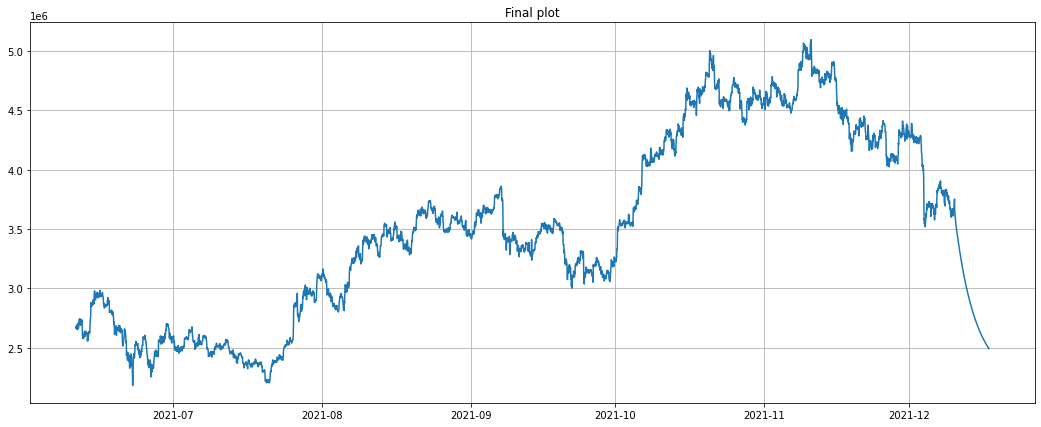

In [148]:
# calling prediction function to display the forecasted data along with data collected through yahoo API
prediction(target[:,0],Actual_forecast,f)

# 10. check for errors and find the accuracy of the model

In [149]:
y_train_org = Std_scaler.inverse_transform(y_train.reshape(-1,1))
y_test_org = Std_scaler.inverse_transform(y_test.reshape(-1,1))

In [150]:
y_train_ss = Std_scaler.inverse_transform(y_train_pred)
y_test_ss = Std_scaler.inverse_transform(y_test_pred)

# 11. evaluate the model by performing respective test


In [151]:
performance_evaluation(y_train_org,y_train_ss,y_test_org,y_test_ss)

RMSE for test data = 45412.162293743306
RMSE for training data =  30407.799966849707
MAPE for trainig data = 0.7102174621668924
MAPE for testing data= 0.827849969230287
coefficient of determinant testing data=  0.9777302701635558
coefficient of determinant for training data=  0.9967090451593128


In [152]:
performance_evaluation(y_train,y_train_pred,y_test,y_test_pred)

RMSE for test data = 0.015570257049374413
RMSE for training data =  0.01042578674500788
MAPE for trainig data = inf
MAPE for testing data= 15.209064868647834
coefficient of determinant testing data=  0.9777303095051971
coefficient of determinant for training data=  0.9967090473876337


In [153]:
rmse_training = np.sqrt(mean_squared_error(y_train,y_train_pred))
rmse_testing = np.sqrt(mean_squared_error(y_test,y_test_pred))
mape_training = mape(y_train_org,y_train_ss)
mape_testing = mape(y_test_org,y_test_ss)
r2_train = r2_score(y_train_org,y_train_ss)
r2_test =   r2_score(y_test_org,y_test_ss)

In [154]:
update_result_set('Single_LSTM',Ticker[index],target_col[key],rmse_training,rmse_testing,mape_training,mape_testing,r2_train,r2_test)
res

,Model_name,Crypto,Target,RMSE_training,RMSE_testing,MAPE_training,MAPE_testing,training_r2_Score,testing_r2_score
0,Single_LSTM,DOGE-INR,Close,0.015496,1.309740,1.210257,0.991827,0.968000,0.016218
1,Single_LSTM,BTC-INR,Close,0.029546,0.132824,0.530292,2.043755,0.997287,0.820846
2,Single_LSTM,BTC-INR,Close,0.030231,0.099484,0.559713,1.512807,0.997160,0.899497
3,Single_LSTM,BTC-INR,Close,0.029383,0.081806,0.530258,1.294163,0.997317,0.932042
4,Single_LSTM,BTC-INR,Avg price,0.018296,0.051632,0.335994,0.758085,0.998959,0.972853
5,Single_LSTM,BTC-INR,Close,0.018296,0.051632,0.335994,0.758085,0.998959,0.972853
6,Single_LSTM,ETH-INR,Close,0.009563,0.038517,0.818540,1.966649,0.997199,0.882075
7,Single_LSTM,ETH-INR,Close,0.010089,0.016611,0.841404,0.990713,0.997142,0.966189
8,Single_LSTM,ETH-INR,Avg price,0.011733,0.015792,1.059297,0.970924,0.996166,0.969523
9,Bi_LSTM,BTC-INR,Avg price,0.008972,0.014602,0.680993,0.810174,0.997086,0.966027


In [107]:
#res.to_excel(excel_writer='//content//sample_data//metrics-new.xlsx')

In [108]:

'''filename1 = 'Single_+Ticker[index]+'_'+target_col[key]+'.json'
filename2 =  'Single_+Ticker[index]+'_'+target_col[key]+'.h5'
fname = Single_LSTM_model.to_json()
with open(filename1,"w") as file:        
        file.write(fname)
Single_LSTM_model.save_weights(filename2)'''


'filename1 = \'Single_+Ticker[index]+\'_\'+target_col[key]+\'.json\'\nfilename2 =  \'Single_+Ticker[index]+\'_\'+target_col[key]+\'.h5\'\nfname = Single_LSTM_model.to_json()\nwith open(filename1,"w") as file:        \n        file.write(fname)\nSingle_LSTM_model.save_weights(filename2)'

Stacked LSTM model

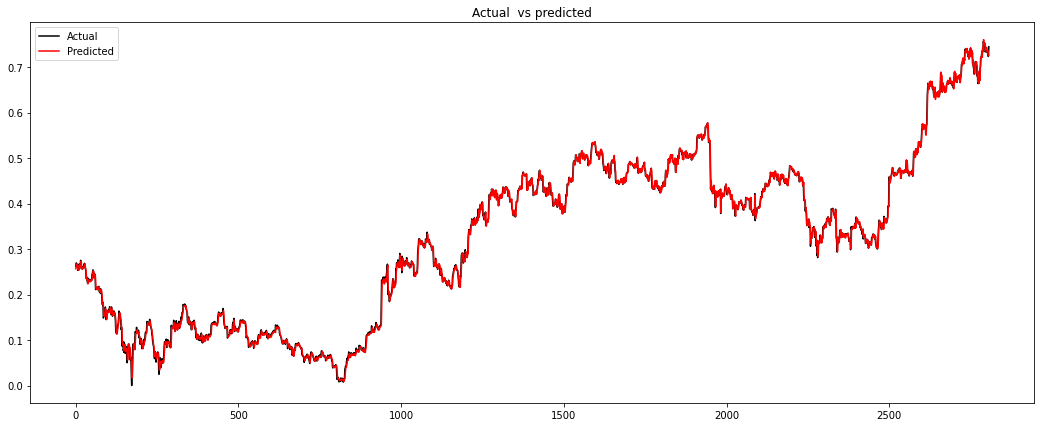

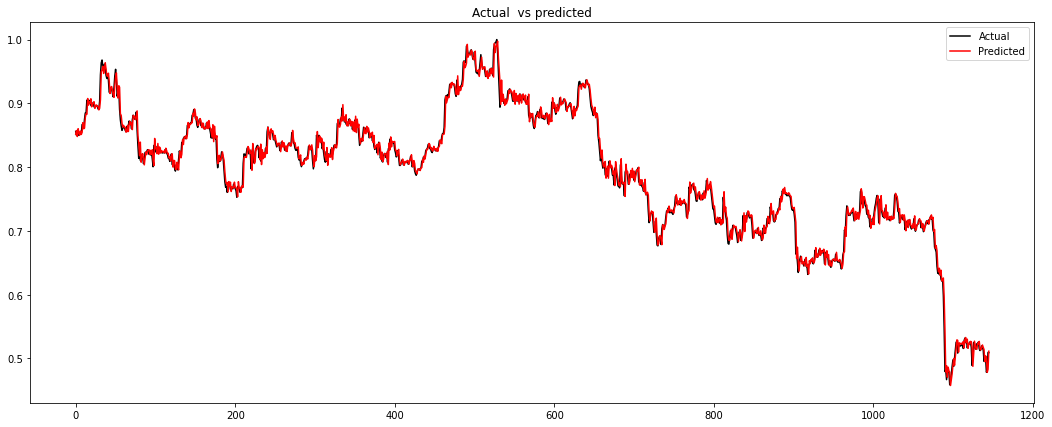

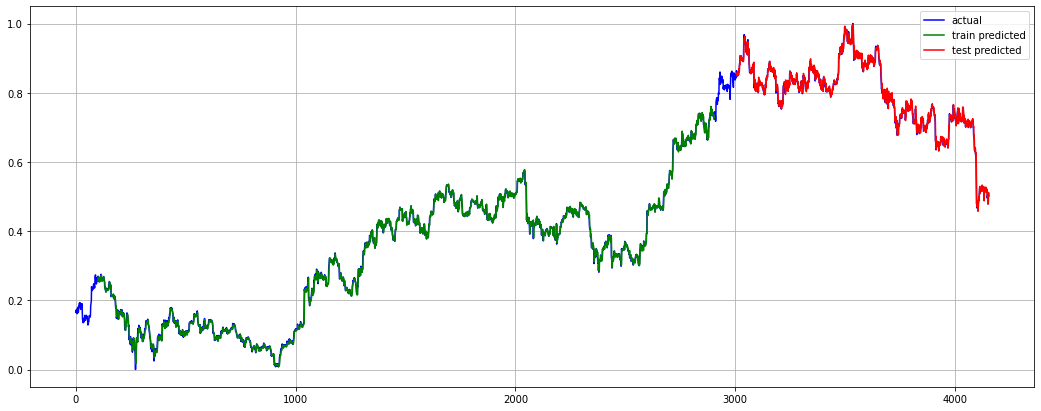

In [109]:
# stacked lstm

y_train_pred_Stacked = Stacked_LSTM_model.predict(X_train_Single_LSTM)
y_test_pred_Stacked = Stacked_LSTM_model.predict(X_test_Single_LSTM)
# calling tis function to showhow our model performed agains actual training and testing data
pred_vs_actual(y_train,y_train_pred_Stacked)
pred_vs_actual(y_test,y_test_pred_Stacked)


##

time_step=100
trainPredictPlot = np.empty_like(price_list)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(X_train)+time_step, :] = y_train_pred_Stacked

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_list)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(X_train)+(time_step*2)+1:len(price_list)-1, :] = y_test_pred_Stacked

# plot baseline and predictions
plt.plot(price_list,label='actual',color='blue')
plt.plot(trainPredictPlot,label='train predicted',color='green')
plt.plot(testPredictPlot,label='test predicted',color='red')
plt.legend()
plt.grid()
plt.show()





In [110]:
###

X_input = test_data[len(test_data)-time_step:]
temp_input = list(X_input.reshape(time_step))

forecasted_values = forecast_future(temp_input,last,time_step,Stacked_LSTM_model)

Actual_forecast = Std_scaler.inverse_transform(forecasted_values)

result2 = pd.DataFrame(data={'Actual':examine,'predicted':Actual_forecast[:,0]})
result2['difference'] = np.abs(result2.Actual - result2.predicted)
result2

1/1 [==============================] - 0s 32ms/step


,Actual,predicted,difference
0,3629035.000000,3642773.551079,13738.551079
1,3685996.250000,3641810.115588,44186.134412
2,3700671.750000,3641769.262585,58902.487415
3,3695344.750000,3643485.436379,51859.313621
4,3713257.750000,3646150.616731,67107.133269
...,...,...,...
95,3752640.500000,3818362.016176,65721.516176
96,3654204.250000,3820538.698923,166334.448923
97,3633669.500000,3822725.638381,189056.138381
98,3606279.750000,3824922.486865,218642.736865


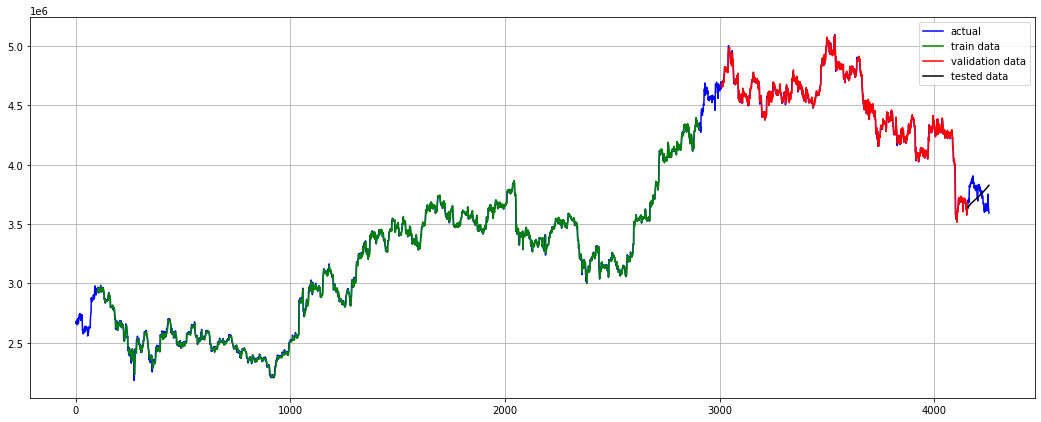

In [111]:
time_step=100
# trained
trainPredictPlot = np.empty_like(target)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(X_train)+time_step, :] = Std_scaler.inverse_transform(y_train_pred_Stacked)

# shift test predictions for plotting
# validated
testPredictPlot = np.empty_like(target)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(X_train)+(time_step*2)+1:len(price_list)-1, :] = Std_scaler.inverse_transform(y_test_pred_Stacked)


# predicted
predicted = np.empty_like(target)
predicted[:, :] = np.nan
predicted[len(price_list):, :] = Actual_forecast

# plot baseline and predictions
plt.plot(target,label='actual',color='blue')
plt.plot(trainPredictPlot,label='train data',color='green')
plt.plot(testPredictPlot,label='validation data',color='red')
plt.plot(predicted,label='tested data',color='black')
plt.legend()
plt.grid()
plt.show()

In [112]:
# already choosen 'f' value above no need to choose again

1/1 [==============================] - 0s 37ms/step


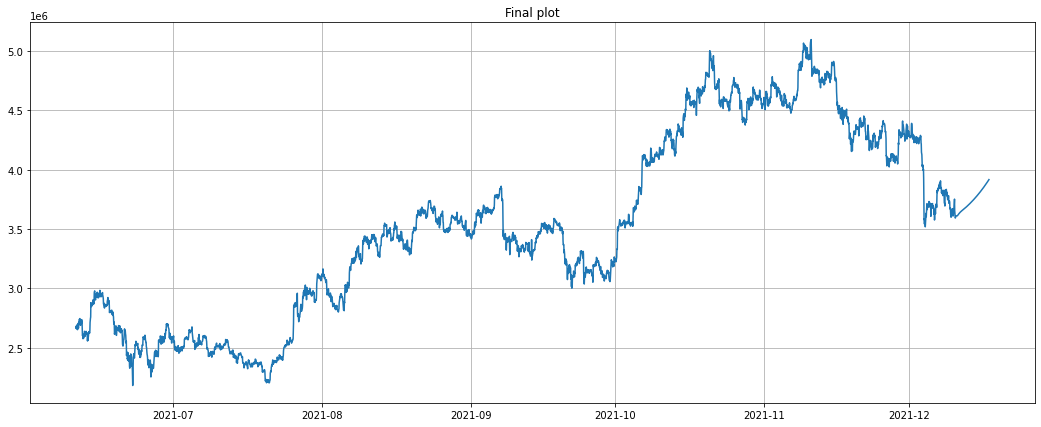

In [113]:
input_data = scaled_data.values
X_input = input_data[-time_step:,0]
X_input = X_input.reshape(-1,1)
temp_input = list(X_input.reshape(time_step))
forecasted_values = see_future(temp_input,f,time_step,Stacked_LSTM_model,X_input)
Actual_forecast = Std_scaler.inverse_transform(forecasted_values)

## Plot final future prediction for the value of f

prediction(target[:,0],Actual_forecast,f)

In [114]:
y_train_org = Std_scaler.inverse_transform(y_train.reshape(-1,1))
y_test_org = Std_scaler.inverse_transform(y_test.reshape(-1,1))

###############
y_train_stack = Std_scaler.inverse_transform(y_train_pred_Stacked)
y_test_stack = Std_scaler.inverse_transform(y_test_pred_Stacked)

##############
performance_evaluation(y_train_org,y_train_stack,y_test_org,y_test_stack)  # performance measure on Original magnetude data

print("#####################################################")

performance_evaluation(y_train,y_train_pred_Stacked,y_test,y_test_pred_Stacked)  # performance measure on scaled data

print("#####################################################")

rmse_training_stacked = np.sqrt(mean_squared_error(y_train,y_train_pred_Stacked)) # calculate rmse for scaled training data
rmse_testing_stacked = np.sqrt(mean_squared_error(y_test,y_test_pred_Stacked)) # calculate rmse for scaled test data
mape_training_stacked = mape(y_train_org,y_train_stack) # calculate mape for original training data
mape_testing_stacked = mape(y_test_org,y_test_stack) # calculate mape for original test data
r2_train_stacked = r2_score(y_train_org,y_train_stack)
r2_test_stacked =   r2_score(y_test_org,y_test_stack)



update_result_set('Stacked_LSTM',Ticker[index],target_col[key],rmse_training_stacked,rmse_testing_stacked,mape_training_stacked,mape_testing_stacked,r2_train_stacked,r2_test_stacked)
res

RMSE for test data = 30605.57655516209
RMSE for training data =  24724.387166867535
MAPE for trainig data = 0.5409177981862275
MAPE for testing data= 0.49533987976728133
coefficient of determinant testing data=  0.9898848642301954
coefficient of determinant for training data=  0.9978242800450299
#####################################################
RMSE for test data = 0.010493602395177642
RMSE for training data =  0.008477143135590013
MAPE for trainig data = inf
MAPE for testing data= 15.380550154083055
coefficient of determinant testing data=  0.9898848616837612
coefficient of determinant for training data=  0.9978242800874768
#####################################################


,Model_name,Crypto,Target,RMSE_training,RMSE_testing,MAPE_training,MAPE_testing,training_r2_Score,testing_r2_score
0,Single_LSTM,DOGE-INR,Close,0.015496,1.309740,1.210257,0.991827,0.968000,0.016218
1,Single_LSTM,BTC-INR,Close,0.029546,0.132824,0.530292,2.043755,0.997287,0.820846
2,Single_LSTM,BTC-INR,Close,0.030231,0.099484,0.559713,1.512807,0.997160,0.899497
3,Single_LSTM,BTC-INR,Close,0.029383,0.081806,0.530258,1.294163,0.997317,0.932042
4,Single_LSTM,BTC-INR,Avg price,0.018296,0.051632,0.335994,0.758085,0.998959,0.972853
5,Single_LSTM,BTC-INR,Close,0.018296,0.051632,0.335994,0.758085,0.998959,0.972853
6,Single_LSTM,ETH-INR,Close,0.009563,0.038517,0.818540,1.966649,0.997199,0.882075
7,Single_LSTM,ETH-INR,Close,0.010089,0.016611,0.841404,0.990713,0.997142,0.966189
8,Single_LSTM,ETH-INR,Avg price,0.011733,0.015792,1.059297,0.970924,0.996166,0.969523
9,Bi_LSTM,BTC-INR,Avg price,0.008972,0.014602,0.680993,0.810174,0.997086,0.966027


In [115]:
filename1 = 'Stacked_LSTM'+Ticker[index]+'_'+target_col[key]+'.json'
filename2 = 'Stacked_LSTM'+Ticker[index]+'_'+target_col[key]+'.h5'
fname = Single_LSTM_model.to_json()
with open(filename1,"w") as file:        
        file.write(fname)
Single_LSTM_model.save_weights(filename2)

In [116]:
# Bidirectional LSTM


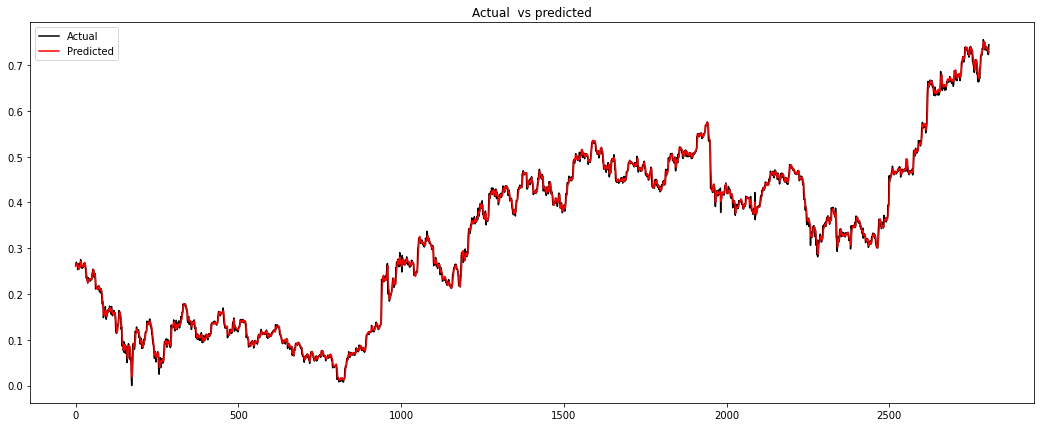

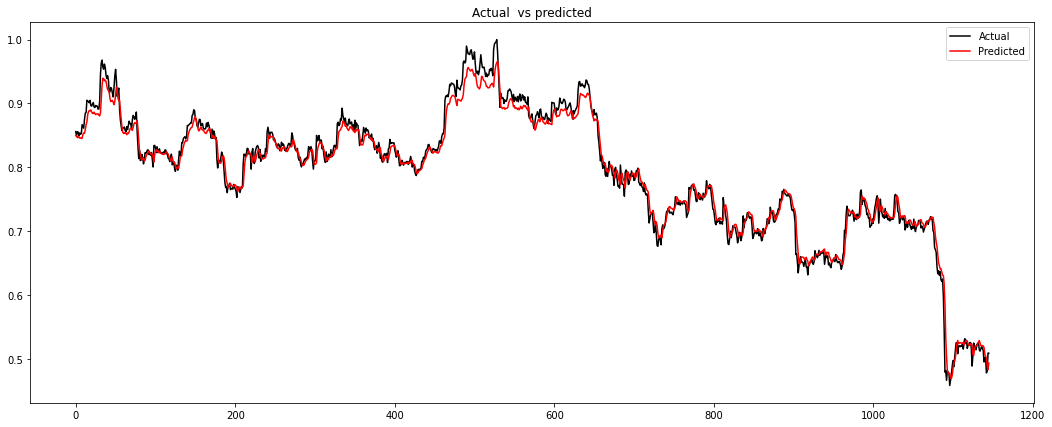

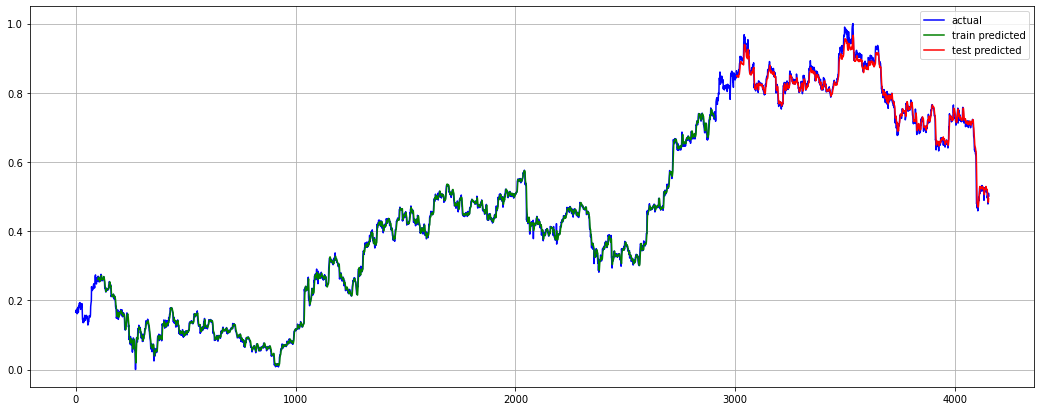

In [117]:

y_train_pred_Bid = Bidirectional_LSTM_model.predict(X_train_Bd_LSTM)
y_test_pred_Bid = Bidirectional_LSTM_model.predict(X_test_Bd_LSTM)
# calling tis function to showhow our model performed agains actual training and testing data
pred_vs_actual(y_train,y_train_pred_Bid)
pred_vs_actual(y_test,y_test_pred_Bid)


##

time_step=100
trainPredictPlot = np.empty_like(price_list)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(X_train)+time_step, :] = y_train_pred_Bid

# shift test predictions for plotting
testPredictPlot = np.empty_like(price_list)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(X_train)+(time_step*2)+1:len(price_list)-1, :] = y_test_pred_Bid

# plot baseline and predictions
plt.plot(price_list,label='actual',color='blue')
plt.plot(trainPredictPlot,label='train predicted',color='green')
plt.plot(testPredictPlot,label='test predicted',color='red')
plt.legend()
plt.grid()
plt.show()

In [118]:
X_input = test_data[len(test_data)-time_step:]
temp_input = list(X_input.reshape(time_step))

forecasted_values = forecast_future(temp_input,last,time_step,Bidirectional_LSTM_model)

Actual_forecast = Std_scaler.inverse_transform(forecasted_values)

result3 = pd.DataFrame(data={'Actual':examine,'predicted':Actual_forecast[:,0]})
result3['difference'] = np.abs(result3.Actual - result3.predicted)
result3

1/1 [==============================] - 0s 38ms/step


,Actual,predicted,difference
0,3629035.000000,3644155.425622,15120.425622
1,3685996.250000,3644890.258141,41105.991859
2,3700671.750000,3645530.346462,55141.403538
3,3695344.750000,3646546.630093,48798.119907
4,3713257.750000,3648472.458019,64785.291981
...,...,...,...
95,3752640.500000,3892368.012665,139727.512665
96,3654204.250000,3897121.911426,242917.661426
97,3633669.500000,3901724.219472,268054.719472
98,3606279.750000,3905539.542229,299259.792229


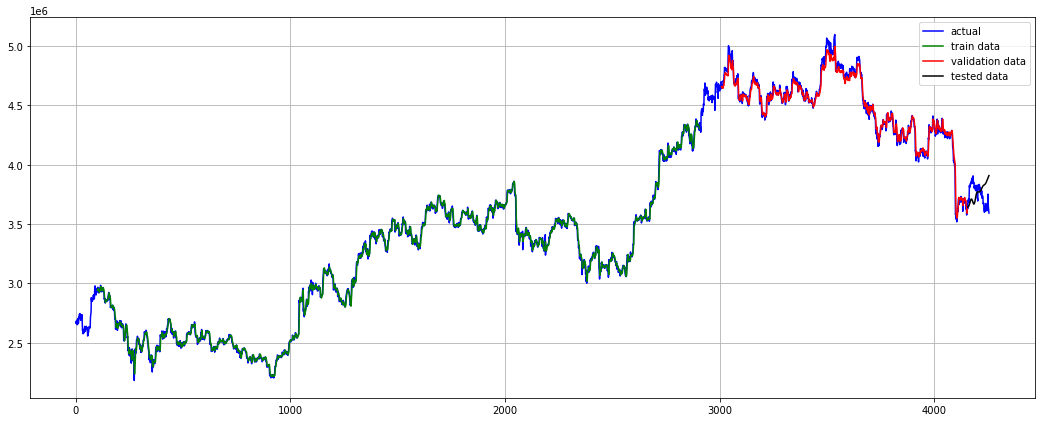

In [119]:
time_step=100
# trained
trainPredictPlot = np.empty_like(target)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(X_train)+time_step, :] = Std_scaler.inverse_transform(y_train_pred_Bid)

# shift test predictions for plotting
# validated
testPredictPlot = np.empty_like(target)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(X_train)+(time_step*2)+1:len(price_list)-1, :] = Std_scaler.inverse_transform(y_test_pred_Bid)


# predicted
predicted = np.empty_like(target)
predicted[:, :] = np.nan
predicted[len(price_list):, :] = Actual_forecast

# plot baseline and predictions
plt.plot(target,label='actual',color='blue')
plt.plot(trainPredictPlot,label='train data',color='green')
plt.plot(testPredictPlot,label='validation data',color='red')
plt.plot(predicted,label='tested data',color='black')
plt.legend()
plt.grid()
plt.show()

1/1 [==============================] - 0s 37ms/step


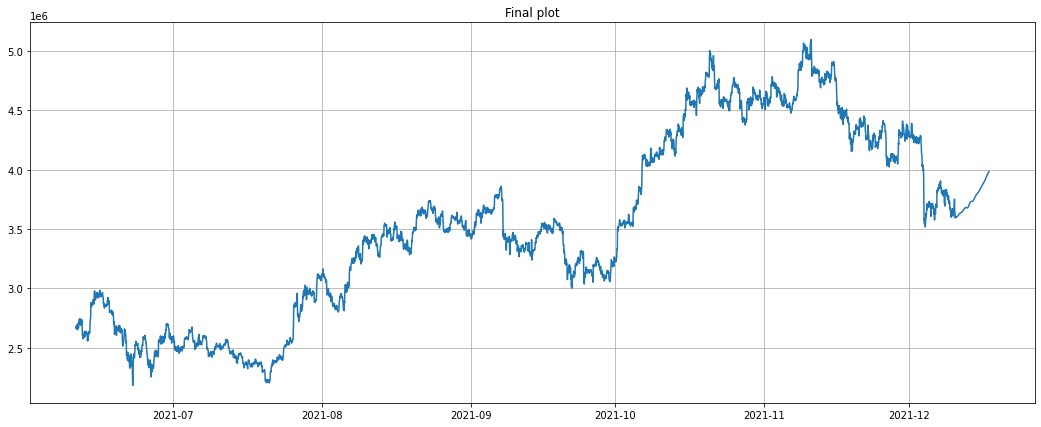

In [120]:
input_data = scaled_data.values
X_input = input_data[-time_step:,0]
X_input = X_input.reshape(-1,1)
temp_input = list(X_input.reshape(time_step))
forecasted_values = see_future(temp_input,f,time_step,Bidirectional_LSTM_model,X_input)
Actual_forecast = Std_scaler.inverse_transform(forecasted_values)

## Plot final future prediction for the value of f

prediction(target[:,0],Actual_forecast,f)

In [121]:
y_train_org = Std_scaler.inverse_transform(y_train.reshape(-1,1))
y_test_org = Std_scaler.inverse_transform(y_test.reshape(-1,1))

###############
y_train_Bid = Std_scaler.inverse_transform(y_train_pred_Bid)
y_test_Bid = Std_scaler.inverse_transform(y_test_pred_Bid)

##############
performance_evaluation(y_train_org,y_train_stack,y_test_org,y_test_stack)  # performance measure on Original magnetude data

print("#####################################################")

performance_evaluation(y_train,y_train_pred_Stacked,y_test,y_test_pred_Stacked)  # performance measure on scaled data

print("#####################################################")

rmse_training_Bi = np.sqrt(mean_squared_error(y_train,y_train_pred_Bid)) # calculate rmse for scaled training data
rmse_testing_Bi = np.sqrt(mean_squared_error(y_test,y_test_pred_Bid)) # calculate rmse for scaled test data
mape_training_Bi = mape(y_train_org,y_train_Bid) # calculate mape for original training data
mape_testing_Bi = mape(y_test_org,y_test_Bid) # calculate mape for original test data
r2_train_Bi = r2_score(y_train_org,y_train_Bid)
r2_test_Bi =   r2_score(y_test_org,y_test_Bid)

update_result_set('Bi_LSTM',Ticker[index],target_col[key],rmse_training_Bi,rmse_testing_Bi,mape_training_Bi,mape_testing_Bi,r2_train_Bi,r2_test_Bi)
res

RMSE for test data = 30605.57655516209
RMSE for training data =  24724.387166867535
MAPE for trainig data = 0.5409177981862275
MAPE for testing data= 0.49533987976728133
coefficient of determinant testing data=  0.9898848642301954
coefficient of determinant for training data=  0.9978242800450299
#####################################################
RMSE for test data = 0.010493602395177642
RMSE for training data =  0.008477143135590013
MAPE for trainig data = inf
MAPE for testing data= 15.380550154083055
coefficient of determinant testing data=  0.9898848616837612
coefficient of determinant for training data=  0.9978242800874768
#####################################################


,Model_name,Crypto,Target,RMSE_training,RMSE_testing,MAPE_training,MAPE_testing,training_r2_Score,testing_r2_score
0,Single_LSTM,DOGE-INR,Close,0.015496,1.309740,1.210257,0.991827,0.968000,0.016218
1,Single_LSTM,BTC-INR,Close,0.029546,0.132824,0.530292,2.043755,0.997287,0.820846
2,Single_LSTM,BTC-INR,Close,0.030231,0.099484,0.559713,1.512807,0.997160,0.899497
3,Single_LSTM,BTC-INR,Close,0.029383,0.081806,0.530258,1.294163,0.997317,0.932042
4,Single_LSTM,BTC-INR,Avg price,0.018296,0.051632,0.335994,0.758085,0.998959,0.972853
5,Single_LSTM,BTC-INR,Close,0.018296,0.051632,0.335994,0.758085,0.998959,0.972853
6,Single_LSTM,ETH-INR,Close,0.009563,0.038517,0.818540,1.966649,0.997199,0.882075
7,Single_LSTM,ETH-INR,Close,0.010089,0.016611,0.841404,0.990713,0.997142,0.966189
8,Single_LSTM,ETH-INR,Avg price,0.011733,0.015792,1.059297,0.970924,0.996166,0.969523
9,Bi_LSTM,BTC-INR,Avg price,0.008972,0.014602,0.680993,0.810174,0.997086,0.966027


In [122]:
filename1 = 'bi_LSTM_'+Ticker[index]+'_'+target_col[key]+'.json'
filename2 = 'bi_LSTM_'+Ticker[index]+'_'+target_col[key]+'.h5'
fname = Bidirectional_LSTM_model.to_json()
with open(filename1,"w") as file:        
        file.write(fname)
Bidirectional_LSTM_model.save_weights(filename2)

In [123]:
res.to_excel(excel_writer='//content//sample_data//newdata1.xlsx')

In [124]:
'''from keras.models import model_from_json'''

'from keras.models import model_from_json'

In [125]:


'''file = open(filename,'r')
load_model = file.read()
file.close()
model = model_from_json(load_model)
'''



"file = open(filename,'r')\nload_model = file.read()\nfile.close()\nmodel = model_from_json(load_model)\n"

In [126]:
'''model.load_weights('Single_LSTM_ETH_avg.h5')'''

"model.load_weights('Single_LSTM_ETH_avg.h5')"

In [127]:
'''y_t_pred = model.predict(X_train)'''

'y_t_pred = model.predict(X_train)'

In [128]:
'''y_te_pred = model.predict(X_test)'''

'y_te_pred = model.predict(X_test)'

In [129]:
'''performance_evaluation(y_train,y_t_pred,y_test,y_te_pred)'''

'performance_evaluation(y_train,y_t_pred,y_test,y_te_pred)'

In [130]:
'''time_step=30
trainPredictPlot = np.empty_like(price_list)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(X_train)+time_step, :] = y_t_pred
# shift test predictions for plotting
testPredictPlot = np.empty_like(price_list)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(X_train)+(time_step*2)+1:len(price_list)-1, :] = y_te_pred
# plot baseline and predictions
plt.plot(price_list,label='actual',color='blue')
plt.plot(trainPredictPlot,label='train predicted',color='green')
plt.plot(testPredictPlot,label='test predicted',color='red')
plt.legend()
plt.grid()
plt.show()'''

"time_step=30\ntrainPredictPlot = np.empty_like(price_list)\ntrainPredictPlot[:, :] = np.nan\ntrainPredictPlot[time_step:len(X_train)+time_step, :] = y_t_pred\n# shift test predictions for plotting\ntestPredictPlot = np.empty_like(price_list)\ntestPredictPlot[:, :] = np.nan\ntestPredictPlot[len(X_train)+(time_step*2)+1:len(price_list)-1, :] = y_te_pred\n# plot baseline and predictions\nplt.plot(price_list,label='actual',color='blue')\nplt.plot(trainPredictPlot,label='train predicted',color='green')\nplt.plot(testPredictPlot,label='test predicted',color='red')\nplt.legend()\nplt.grid()\nplt.show()"

In [131]:
'''pip install keras-tuner'''

'pip install keras-tuner'

In [132]:
'''from keras_tuner.tuners import RandomSearch'''

'from keras_tuner.tuners import RandomSearch'

In [133]:
'''def build_models(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=64,step=1),return_sequences=True, input_shape=(30,1)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=62,step=2),return_sequences=True))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=62,step=1)))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])
    return model'''

"def build_models(hp):\n    model = Sequential()\n    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=64,step=1),return_sequences=True, input_shape=(30,1)))\n    for i in range(hp.Int('n_layers', 1, 4)):\n        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=62,step=2),return_sequences=True))\n    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))\n    model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=62,step=1)))\n    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))\n    model.add(Dense(1))\n    model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mse'])\n    return model"

In [134]:
'''tuner= RandomSearch(
        build_models,
        objective='mse',
        max_trials=5,
        executions_per_trial=1
        )'''

"tuner= RandomSearch(\n        build_models,\n        objective='mse',\n        max_trials=5,\n        executions_per_trial=1\n        )"

In [135]:
'''tuner.search(
        x=X_train,
        y=y_train,
        epochs=20,
        batch_size=128,
        validation_data=(X_test,y_test),
)'''

'tuner.search(\n        x=X_train,\n        y=y_train,\n        epochs=20,\n        batch_size=128,\n        validation_data=(X_test,y_test),\n)'

In [136]:
'''tuner.search_space_summary()'''

'tuner.search_space_summary()'

In [137]:
'''tuner.results_summary()'''

'tuner.results_summary()'